In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data = pd.read_csv('../Data/properatti.csv',index_col=0)
data = pd.read_csv('../Data/properatti.csv',index_col=0)

In [3]:
data.head(5)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [4]:
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [5]:
nodesc_index = data.loc[data['description'].isna()].index
data.drop(index=nodesc_index,inplace=True)

# Valores faltantes de 'place_name'

Se aprecia que todos los valores faltantes de 'place_name' corresponden a Tigre. Podríamos generar una función para tomar este valore de la columna 'place_with_parent_name', pero lo vamos a hardcodear.

In [6]:
def get_all_place_names(text):
    places_lst = [item for item in text.split(sep='|') if len(item)>0]
    return('|'.join(places_lst))
    #return places_lst

def get_all_place_number(text):
    places_lst = [item for item in text.split(sep='|') if len(item)>0]
    return len(places_lst)


def get_place_names(text):
    place_names = text.split(sep='|')
    place_names = [item for item in place_names if len(item)>0]
    place_names = place_names[0:-1]
    complete_names = '|'.join(place_names)
    return '|'+complete_names+'|'

In [7]:
data['place_name'].fillna('Tigre',inplace=True)
#data.groupby('place_name')['place_name'].unique()

Vemos un lugar que se llama 'coordenadas 34.255511'. Vamos a verificar qué lugar es en realidad.


In [8]:
data.loc[data['place_name']=='coordenadas 34.255511','place_with_parent_names'].values

array(['|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|coordenadas 34.255511|'],
      dtype=object)

Es Tigre. También hay que arreglarlo.

In [9]:
data.loc[data['place_name']=='coordenadas 34.255511','place_with_parent_names']=get_place_names(data.loc[data['place_name']=='coordenadas 34.255511','place_with_parent_names'].values[0])
data.loc[data['place_name']=='coordenadas 34.255511','place_name']='Tigre'

In [10]:
data.loc[data['place_name']=='coordenadas 34.255511']

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail


In [11]:
data['place_name'] = data['place_name'].str.strip(' ').str.capitalize()

In [12]:
columnas = {0: 'Pais', 1:'Provincia', 2:'Ciudad', 3:'Barrio', 4:'Sub-Barrio'}
location_df = data['place_with_parent_names'].apply(get_all_place_names).str.split(pat='|',expand=True).rename(columns=columnas)
location_df.loc[location_df['Provincia']=='Capital Federal','Sub-Barrio'] = location_df.loc[location_df['Provincia']=='Capital Federal','Barrio']
location_df.loc[location_df['Provincia']=='Capital Federal','Barrio'] = location_df.loc[location_df['Provincia']=='Capital Federal','Ciudad']
location_df.loc[location_df['Provincia']=='Capital Federal','Ciudad'] = location_df.loc[location_df['Provincia']=='Capital Federal','Provincia']
location_df.loc[location_df['Sub-Barrio'].notnull(),'Provincia'].value_counts()

Capital Federal             1198
Bs.As. G.B.A. Zona Norte     548
Name: Provincia, dtype: int64

In [13]:
location_df.head()

,Pais,Provincia,Ciudad,Barrio,Sub-Barrio
0,Argentina,Capital Federal,Capital Federal,Mataderos,None
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,None,None
2,Argentina,Capital Federal,Capital Federal,Mataderos,None
3,Argentina,Capital Federal,Capital Federal,Liniers,None
4,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,None


In [14]:
location_df['complete_place_name'] = data['place_with_parent_names'].apply(get_all_place_names).str.replace('|',', ')
location_df['lat']=data['lat']
location_df['lon']=data['lon']

#Arreglos de algunas coordenadas geográficas.
location_df.loc[location_df['lat']>0,'lat']=location_df.loc[location_df['Provincia']=='Córdoba','lat'].mean()
location_df.loc[location_df['lon']<-75,'lon']=location_df.loc[location_df['Provincia']=='Córdoba','lon'].mean()
location_df.loc[(location_df['Ciudad']=='Capital Federal')&(location_df['lat']<-38),'lon'] =\
location_df.loc[(location_df['Ciudad']=='Capital Federal')&(location_df['Barrio']=='Mataderos'),'lon'].mean()
location_df.loc[(location_df['Ciudad']=='Capital Federal')&(location_df['lat']<-38),'lat'] =\
location_df.loc[(location_df['Ciudad']=='Capital Federal')&(location_df['Barrio']=='Mataderos'),'lat'].mean()

location_df.head()

,Pais,Provincia,Ciudad,Barrio,Sub-Barrio,complete_place_name,lat,lon
0,Argentina,Capital Federal,Capital Federal,Mataderos,None,"Argentina, Capital Federal, Mataderos",-34.661824,-58.508839
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,None,None,"Argentina, Bs.As. G.B.A. Zona Sur, La Plata",-34.903883,-57.964330
2,Argentina,Capital Federal,Capital Federal,Mataderos,None,"Argentina, Capital Federal, Mataderos",-34.652262,-58.522982
3,Argentina,Capital Federal,Capital Federal,Liniers,None,"Argentina, Capital Federal, Liniers",-34.647797,-58.516424
4,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,None,"Argentina, Buenos Aires Costa Atlántica, Mar d...",-38.002626,-57.549447


In [15]:
data = pd.concat(objs=(data.drop(['lat','lon'],axis=1),location_df),axis=1)
data.head()


,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,price,currency,...,title,image_thumbnail,Pais,Provincia,Ciudad,Barrio,Sub-Barrio,complete_place_name,lat,lon
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",62000.0,USD,...,2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,Argentina,Capital Federal,Capital Federal,Mataderos,None,"Argentina, Capital Federal, Mataderos",-34.661824,-58.508839
1,sell,apartment,La plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",150000.0,USD,...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,None,None,"Argentina, Bs.As. G.B.A. Zona Sur, La Plata",-34.903883,-57.964330
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",72000.0,USD,...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,Argentina,Capital Federal,Capital Federal,Mataderos,None,"Argentina, Capital Federal, Mataderos",-34.652262,-58.522982
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",95000.0,USD,...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,Argentina,Capital Federal,Capital Federal,Liniers,None,"Argentina, Capital Federal, Liniers",-34.647797,-58.516424
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",64000.0,USD,...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,None,"Argentina, Buenos Aires Costa Atlántica, Mar d...",-38.002626,-57.549447


In [16]:
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Abasto'),'Barrio']='Balvanera'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Barrio Norte'),'Barrio']='Recoleta'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Catalinas'),'Barrio']='Retiro'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Centro / Microcentro'),'Barrio']='San Nicolás'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Congreso'),'Barrio']='Balvanera'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Las Cañitas'),'Barrio']='Palermo'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Once'),'Barrio']='Balvanera'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Parque Centenario'),'Barrio']='Caballito'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Pompeya'),'Barrio']='Nueva Pompeya'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Tribunales'),'Barrio']='San Nicolás'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Villa General Mitre'),'Barrio']='Villa Gral. Mitre'

data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Villa del Parque'),'Barrio']='Villa Del Parque'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Agronomía'),'Barrio']='Agronomia'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Constitución'),'Barrio']='Constitucion'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Villa Pueyrredón'),'Barrio']='Villa Pueyrredon'
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='San Nicolás'),'Barrio']='San Nicolas'

## Visualización del $/m2 por barrio

In [17]:
location_df.columns

Index(['Pais', 'Provincia', 'Ciudad', 'Barrio', 'Sub-Barrio',
       'complete_place_name', 'lat', 'lon'],
      dtype='object')

C:\Users\JAVI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


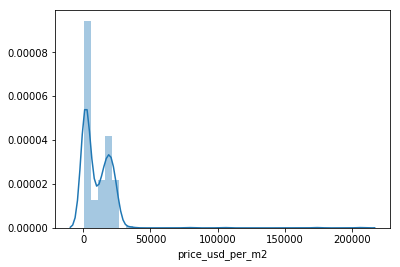

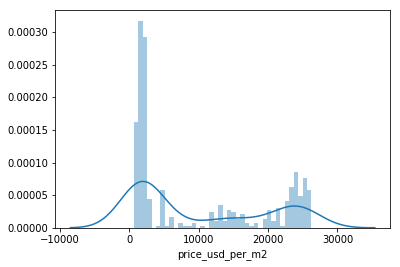

In [18]:
sns.distplot(data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Boedo')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'],bins=40)
plt.show()
sns.distplot(data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='San Cristobal')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'],bins=40)
plt.show()

C:\Users\JAVI\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


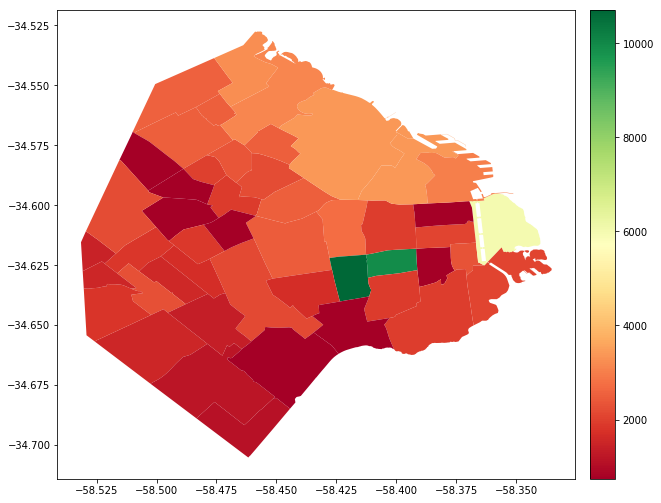

In [19]:
import geopandas
import fiona
import rtree
import folium

from shapely.geometry import Point

def from_x_y(df, x, y):
    gdf = geopandas.GeoDataFrame(df,#.drop([x, y], axis=1),
                                crs={'init': 'epsg:4326'},
                                geometry=[Point(xy) for xy in zip(df[x], df[y])])
    return gdf

def from_wkt(df, wkt_column):
    import shapely.wkt
    df["coordinates"]= df[wkt_column].apply(shapely.wkt.loads)
    gdf = geopandas.GeoDataFrame(df, geometry='coordinates')
    return gdf

barrios = pd.read_csv("../Data/barrios.csv", encoding='latin1')
barrios = from_wkt(barrios, "WKT")
barrios.rename(columns={'BARRIO': 'Barrio'},inplace=True)
barrios['Barrio']=barrios['Barrio'].str.title()
location_df['price_usd_per_m2']=data['price_usd_per_m2']

location_df = from_x_y(location_df, "lon", "lat")
precio_por_barrio = location_df.loc[(location_df['Ciudad']=='Capital Federal')&(location_df['price_usd_per_m2'].notnull()),['Barrio','price_usd_per_m2','geometry']].groupby('Barrio').mean().reset_index()
barrios_con_precios = pd.merge(barrios[['Barrio','coordinates']],precio_por_barrio,how='left')
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1,figsize=(10, 10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

barrios_con_precios.plot(column='price_usd_per_m2',ax=ax,cax=cax,legend=True,cmap='RdYlGn')

#fig, ax = plt.subplots(1, 1,figsize=(10, 10))
#barrios.plot(ax=ax,edgecolor='black',color='white')
#location_df.loc[(location_df['Ciudad']=='Capital Federal')&(location_df.geometry.is_valid)].plot(ax=ax)

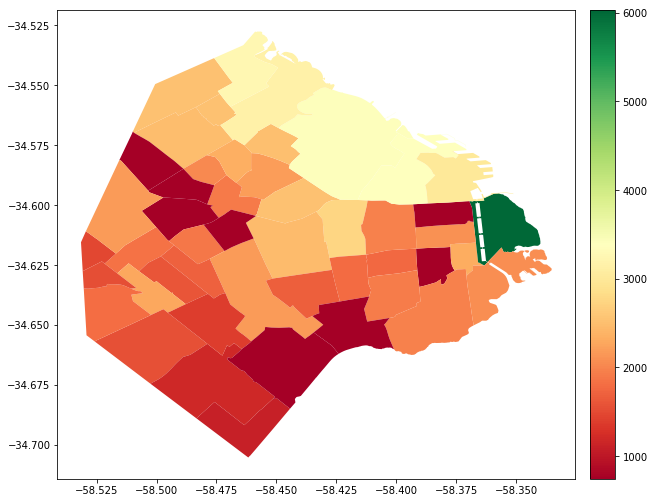

In [20]:
location_df.loc[(location_df['Ciudad']=='Capital Federal')&(location_df['Barrio']=='Boedo')&(location_df['price_usd_per_m2']>4000),'price_usd_per_m2']=np.nan
location_df.loc[(location_df['Ciudad']=='Capital Federal')&(location_df['Barrio']=='San Cristobal')&(location_df['price_usd_per_m2']>4000),'price_usd_per_m2']=np.nan
precio_por_barrio = location_df.loc[(location_df['Ciudad']=='Capital Federal')&(location_df['price_usd_per_m2'].notnull()),['Barrio','price_usd_per_m2','geometry']].groupby('Barrio').mean().reset_index()
barrios_con_precios = pd.merge(barrios[['Barrio','coordinates']],precio_por_barrio,how='left')
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1,figsize=(10, 10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

barrios_con_precios.plot(column='price_usd_per_m2',ax=ax,cax=cax,legend=True,cmap='RdYlGn')


Hacemos la corrección de los $/m2 inválidos de algunos barrios de Capital Federal.

In [21]:
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Boedo')&(data['price_usd_per_m2']>4000),'price_usd_per_m2']=np.nan
data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='San Cristobal')&(data['price_usd_per_m2']>4000),'price_usd_per_m2']=np.nan

C:\Users\JAVI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


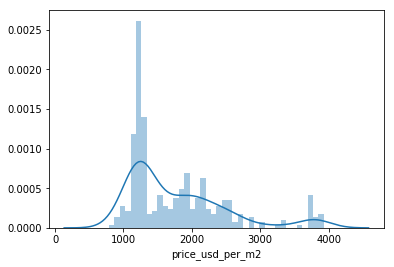

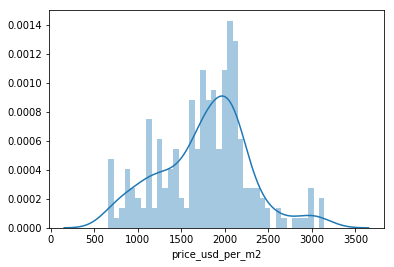

In [22]:
sns.distplot(data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='Boedo')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'],bins=40)
plt.show()
sns.distplot(data.loc[(data['Ciudad']=='Capital Federal')&(data['Barrio']=='San Cristobal')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'],bins=40)
plt.show()

# Limpieza, búsqueda y llenado de columnas de Precios

In [23]:
price_cols = ['price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2']
data[price_cols].sample(5)

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
2126,NaN,NaN,NaN,NaN,56.0,40.0,NaN,NaN
100486,218000.0,USD,3846501.00,218000.0,64.0,64.0,3406.250000,3406.250000
96469,154684.0,USD,2729321.83,154684.0,60.0,49.0,2578.066667,3156.816327
111646,138000.0,USD,2434941.00,138000.0,NaN,61.0,NaN,2262.295082
102180,103000.0,USD,1817383.50,103000.0,43.0,40.0,2395.348837,2575.000000


In [24]:
data[price_cols].notnull().sum()

price                         100808
currency                      100807
price_aprox_local_currency    100808
price_aprox_usd               100808
surface_total_in_m2            81892
surface_covered_in_m2         101312
price_usd_per_m2               67966
price_per_m2                   87657
dtype: int64

In [25]:
data['currency'].value_counts()

USD    87586
ARS    13218
PEN        2
UYU        1
Name: currency, dtype: int64

Se dropearán las 2 publicaciones en Sol Peruano (PEN) y la publicación en Peso Uruguayo (UYU). 

In [26]:
data.drop(data.loc[(data['currency']=='UYU')|(data['currency']=='PEN')].index,inplace=True)
data['currency'].value_counts()

USD    87586
ARS    13218
Name: currency, dtype: int64

Además se decide trabajar todo en la misma moneda, en dólares (USD). Para esto se deberán convertir los valores de 'price' y 'price_per_m2' de las filas donde 'currency' sea ARS.

In [27]:
TC_ARS_aproxUSD = (data.loc[data['currency']=='ARS','price']/data.loc[data['currency']=='ARS','price_aprox_usd']).median()
TC_ARS_aproxUSD

17.830501005171033

In [28]:
TC_USD_aproxARS = ((data.loc[data['currency']=='ARS','price_aprox_local_currency'])/(data.loc[data['currency']=='ARS','price_aprox_usd'])).round(decimals=4).unique()[0]
TC_USD_aproxARS

17.6445

Se cambian los valores de 'price' y 'price_per_m2' a sus correspondientes valores en dólares (USD). También se cambia la columna 'currency' a USD. Así todo el dataset se encuentra expresado en dólares, a excepción de la columna 'price_aprox_local_currency' la cual queda en Pesos Argentinos (ARS).

In [29]:
data.loc[data['currency']=='ARS','price']=data.loc[data['currency']=='ARS','price_aprox_usd']
data.loc[data['currency']=='ARS','price_per_m2'] = data.loc[data['currency']=='ARS','price_per_m2'] / TC_ARS_aproxUSD
data.loc[data['currency']=='ARS','currency']='USD'

In [30]:
data['currency'].value_counts()

USD    100804
Name: currency, dtype: int64

In [31]:
def price_search(text):
    pattern = r'(?:USD|U\$D|DOLL|DOL.|U\$S|dolares|dólares|precio|precio total)\s?(\d+,?\.?\d*,?\.?\d*)'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    price_lst = regex.findall(text)
    price_lst = [float(item.replace(',','').replace('.','')) for item in price_lst]
    if not price_lst:
        return np.nan
    if len(price_lst)>1:
        if max(price_lst)>35000:
            return max(price_lst)
        else:
            return np.nan
    if price_lst[0]>35000:
        return price_lst[0]
    else:
        return np.nan
    
def price_search2(text):
    pattern = r'(\d+,?\.?\d*,?\.?\d*)\s?(?:USD|U\$D|DOLL|DOL.|U\$S|dolares|dólares)+'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    price_lst = regex.findall(text)
    price_lst = [float(item.replace(',','').replace('.','')) for item in price_lst]
    
    if not price_lst:
        return np.nan
    if len(price_lst)>1:
        if max(price_lst)>35000:
            return max(price_lst)
        else:
            return np.nan
    if price_lst[0]>35000:
        return price_lst[0]
    else:
        return np.nan
    
def price_search_pesos(text):
    pattern =  r'(?:\$)\s?(\d+,?\.?\d*,?\.?\d*)'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    price_lst = regex.findall(text)
    price_lst = [float(item.replace(',','').replace('.','')) for item in price_lst]
    if not price_lst:
        return np.nan
    if len(price_lst)>1:
        if max(price_lst)>20000:
            return max(price_lst)
        else:
            return np.nan
  
    if len(price_lst)==1:
        if price_lst[0]>35000:
            return price_lst[0]
    
        else:
            return np.nan

Podríamos calcular el price_usd_per_m2:

In [32]:
data.loc[(data['price_aprox_usd'].notnull())&(data['surface_total_in_m2'].notnull())&(data['surface_total_in_m2']!=0)&(data['price_usd_per_m2'].isna()),['price_aprox_usd','surface_total_in_m2','price_usd_per_m2']]

,price_aprox_usd,surface_total_in_m2,price_usd_per_m2
24900,430000.0,37.0,NaN
24901,724500.0,63.0,NaN
25012,1202000.0,37.0,NaN
25113,2003000.0,58.0,NaN
25299,550000.0,30.0,NaN
25391,400200.0,30.0,NaN
25403,402300.0,30.0,NaN
25404,415630.0,30.0,NaN
25406,425000.0,30.0,NaN
25407,406200.0,30.0,NaN


In [33]:
print("Hay price en usd pero no en ars:")
print(data.loc[(data['price_aprox_usd'].notnull())&(data['price_aprox_local_currency'].isnull()),['price_aprox_usd','price_aprox_local_currency']])
print("Hay price en ars pero no en usd:")
print(data.loc[(data['price_aprox_usd'].isna())&(data['price_aprox_local_currency'].notnull()),['price_aprox_usd','price_aprox_local_currency']])

Hay price en usd pero no en ars:
Empty DataFrame
Columns: [price_aprox_usd, price_aprox_local_currency]
Index: []
Hay price en ars pero no en usd:
Empty DataFrame
Columns: [price_aprox_usd, price_aprox_local_currency]
Index: []


Valores de precios igual a cero son inválidos. Cambiar a NaN.

In [34]:
data.loc[data['price_usd_per_m2']==0,'price_usd_per_m2']=np.nan
data.loc[data['price_per_m2']==0,'price_per_m2']=np.nan
data.loc[data['price_aprox_usd']==0,'price_aprox_usd']=np.nan
data.loc[data['price']==0,'price']=np.nan
data.loc[data['price_aprox_local_currency']==0,'price_aprox_local_currency']=np.nan

Superficies menores a 10m2 las tomamos como inválidas.
Lo mismo para superficie cubierta mayor a la total.

Con esto, también debo invalidar los valores de price_per_m2 y price_usd_per_m2.

In [35]:
data.loc[data['surface_covered_in_m2']<10,'surface_covered_in_m2']=np.nan
data.loc[data['surface_total_in_m2']<10,'surface_total_in_m2']=np.nan
sup_inv_index = data.loc[data['surface_covered_in_m2']>data['surface_total_in_m2'],price_cols].index
data.loc[sup_inv_index,'surface_covered_in_m2']=np.nan
data.loc[sup_inv_index,'surface_total_in_m2']=np.nan
data.loc[sup_inv_index,'price_per_m2']=np.nan
data.loc[sup_inv_index,'price_usd_per_m2']=np.nan


data[price_cols].notnull().sum()

price                         100804
currency                      100804
price_aprox_local_currency    100804
price_aprox_usd               100804
surface_total_in_m2            80403
surface_covered_in_m2          99772
price_usd_per_m2               66991
price_per_m2                   86680
dtype: int64

## Búsqueda de valores de Precios en dólares (USD).

In [36]:
price_usd_search_lst = [price_search,price_search2]
col_lst = ['title','description']

print(data[['price_aprox_usd','price_aprox_local_currency']].isnull().sum())
print('----------------------------------------------------')

for col in col_lst:
    for func in price_usd_search_lst:
        data["price_aprox_usd"].fillna(value=data.loc[data['price_aprox_usd'].isna(),col].apply(func), inplace=True)

print(data[['price_aprox_usd']].isnull().sum())
print('----------------------------------------------------')    

print("Hay price en usd pero no en ars:")
print(data.loc[(data['price_aprox_usd'].notnull())&(data['price_aprox_local_currency'].isnull()),['price_aprox_usd','price_aprox_local_currency']].count())



price_aprox_usd               20411
price_aprox_local_currency    20411
dtype: int64
----------------------------------------------------
price_aprox_usd    17816
dtype: int64
----------------------------------------------------
Hay price en usd pero no en ars:
price_aprox_usd               2595
price_aprox_local_currency       0
dtype: int64


Con el valor de **price_aprox_usd** completo: **price** (mismo valor), **currency** (USD) y **price_aprox_local_currency** (convierto con TC_USD_aproxARS).

In [37]:
data.loc[(data['price_aprox_usd'].notnull())&(data['price'].isna()),'price']=data.loc[(data['price_aprox_usd'].notnull())&(data['price'].isna()),'price_aprox_usd']
data.loc[(data['price_aprox_usd'].notnull())&(data['currency'].isna()),'currency']='USD'
data.loc[(data['price_aprox_usd'].notnull())&(data['price_aprox_local_currency'].isna()),'price_aprox_local_currency']=data.loc[(data['price_aprox_usd'].notnull())&(data['price_aprox_local_currency'].isna()),'price_aprox_usd']*TC_USD_aproxARS

data[price_cols].notnull().sum()

price                         103399
currency                      103399
price_aprox_local_currency    103399
price_aprox_usd               103399
surface_total_in_m2            80403
surface_covered_in_m2          99772
price_usd_per_m2               66991
price_per_m2                   86680
dtype: int64

$price\_usd\_per\_m2 = \frac{price\_aprox\_usd}{surface\_total\_in\_m2}$

$price\_per\_m2 = \frac{price}{surface\_covered\_in\_m2}$


Con estos valores y las anteriores relaciones, completo valores de **price_usd_per_m2** y **price_per_m2**:

In [38]:
completar_pusdpm2_index = data.loc[(data['price_usd_per_m2'].isna())&(data['price_aprox_usd'].notnull())&(data['surface_total_in_m2'].notnull())&(data['surface_total_in_m2']!=0),price_cols].index
data.loc[completar_pusdpm2_index,'price_usd_per_m2'] = data.loc[completar_pusdpm2_index,'price_aprox_usd'] / data.loc[completar_pusdpm2_index,'surface_total_in_m2']

completar_parspm2_index = data.loc[(data['price_per_m2'].isna())&(data['price'].notnull())&(data['surface_covered_in_m2'].notnull())&(data['surface_covered_in_m2']!=0),price_cols].index
data.loc[completar_parspm2_index,'price_per_m2'] = data.loc[completar_parspm2_index,'price'] / data.loc[completar_parspm2_index,'surface_covered_in_m2']

data[price_cols].notnull().sum()

price                         103399
currency                      103399
price_aprox_local_currency    103399
price_aprox_usd               103399
surface_total_in_m2            80403
surface_covered_in_m2          99772
price_usd_per_m2               69826
price_per_m2                   89039
dtype: int64

## Búsqueda de valores de Precios en pesos (ARS).

In [39]:
price_ars_search_lst = [price_search_pesos]

col_lst = ['title','description']
for col in col_lst:
    for func in price_ars_search_lst:
        data["price_aprox_local_currency"].fillna(value=data.loc[data['price_aprox_local_currency'].isna(),col].apply(func), inplace=True)

print(data[['price_aprox_local_currency']].isnull().sum())
print('----------------------------------------------------')

print("Hay price en ars pero no en usd:")
print(data.loc[(data['price_aprox_usd'].isna())&(data['price_aprox_local_currency'].notnull()),['price_aprox_usd','price_aprox_local_currency']].count())

price_aprox_local_currency    17423
dtype: int64
----------------------------------------------------
Hay price en ars pero no en usd:
price_aprox_usd                 0
price_aprox_local_currency    393
dtype: int64


Con este valor calculo el valor de price (USD) y price_aprox_usd (USD), con TC_ARS_aproxUSD. Pongo el valor de currency en USD.

In [40]:
#data.loc[(data['price_aprox_local_currency'].notnull())&(data['price'].isna()),price_cols].count()
data.loc[(data['price_aprox_local_currency'].notnull())&(data['price'].isna()),'price'] = data.loc[(data['price_aprox_local_currency'].notnull())&(data['price'].isna()),'price_aprox_local_currency']/TC_ARS_aproxUSD
data.loc[(data['price_aprox_local_currency'].notnull())&(data['price_aprox_usd'].isna()),'price_aprox_usd'] = data.loc[(data['price_aprox_local_currency'].notnull())&(data['price_aprox_usd'].isna()),'price_aprox_local_currency']/TC_ARS_aproxUSD
data.loc[(data['price_aprox_local_currency'].notnull())&(data['currency'].isna()),'currency'] = 'USD'

data[price_cols].notnull().sum()

price                         103792
currency                      103792
price_aprox_local_currency    103792
price_aprox_usd               103792
surface_total_in_m2            80403
surface_covered_in_m2          99772
price_usd_per_m2               69826
price_per_m2                   89039
dtype: int64

$price\_usd\_per\_m2 = \frac{price\_aprox\_usd}{surface\_total\_in\_m2}$

$price\_per\_m2 = \frac{price}{surface\_covered\_in\_m2}$


Con estos valores y las anteriores relaciones, completo valores de **price_usd_per_m2** y **price_per_m2**:

In [41]:
completar_pusdpm2_index = data.loc[(data['price_usd_per_m2'].isna())&(data['price_aprox_usd'].notnull())&(data['surface_total_in_m2'].notnull())&(data['surface_total_in_m2']!=0),price_cols].index
data.loc[completar_pusdpm2_index,'price_usd_per_m2'] = data.loc[completar_pusdpm2_index,'price_aprox_usd'] / data.loc[completar_pusdpm2_index,'surface_total_in_m2']

completar_parspm2_index = data.loc[(data['price_per_m2'].isna())&(data['price'].notnull())&(data['surface_covered_in_m2'].notnull())&(data['surface_covered_in_m2']!=0),price_cols].index
data.loc[completar_parspm2_index,'price_per_m2'] = data.loc[completar_parspm2_index,'price'] / data.loc[completar_parspm2_index,'surface_covered_in_m2']

data[price_cols].notnull().sum()

price                         103792
currency                      103792
price_aprox_local_currency    103792
price_aprox_usd               103792
surface_total_in_m2            80403
surface_covered_in_m2          99772
price_usd_per_m2               70101
price_per_m2                   89286
dtype: int64

Valores de precios igual a cero son inválidos. Cambiar a NaN.

**¿Agregar algún filtro por valor mínimo?**

In [42]:
data.loc[data['price_usd_per_m2']==0,'price_usd_per_m2']=np.nan
data.loc[data['price_per_m2']==0,'price_per_m2']=np.nan
data.loc[data['price_aprox_usd']==0,'price_aprox_usd']=np.nan
data.loc[data['price']==0,'price']=np.nan
data.loc[data['price_aprox_local_currency']==0,'price_aprox_local_currency']=np.nan

In [43]:
data[price_cols].notnull().sum()

price                         103792
currency                      103792
price_aprox_local_currency    103792
price_aprox_usd               103792
surface_total_in_m2            80403
surface_covered_in_m2          99772
price_usd_per_m2               70101
price_per_m2                   89286
dtype: int64

In [44]:
data.loc[(data['surface_total_in_m2'].isna())&(data['price_aprox_usd'].notnull())&(data['price_usd_per_m2'].notnull())&(data['price_per_m2']>=data['price_usd_per_m2']),price_cols]

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2


## Funciones para búsqueda de 'rooms'

In [45]:
def mono_amb_search(text):
    '''Busca si aparece algun monoambiente en el texto.
    '''
    #pattern_1amb = r'mono\s?ambiente'
    #este funciona mejor, captura más.
    pattern_1amb = r'mono\s?h?amb\.?\w+' 
    regex_1amb = re.compile(pattern_1amb, flags = re.IGNORECASE)
    mono_amb = regex_1amb.findall(text)
    if(mono_amb):
        return 1
    else:
        return np.nan

def more_amb_search(text): 
    '''Busca la cantidad de ambientes con dígitos.
    '''
   
    accepted_lst = ['ambientes','ambientes','amb.','amvientes','anvientes','hambientes',
                'hamvientes','hanvientes','ambintes','ambtes','ambiemtes','ambietes',
               'ambieintes','ambeintes','ambentes','ambs','ambietnes','ambienes',
                   'ambientessan','ambc']
    
    accepted = ';'.join(accepted_lst)
    
    pattern_amb = r'(\d+)\s*(h?(?:amb|anv|amv)\.?\w*)'
    regex_amb = re.compile(pattern_amb, flags = re.IGNORECASE)
    ambientes = regex_amb.findall(text)
    
    if not ambientes:
        return np.nan
    if len(ambientes)>1:
        #si es cero, no encontré nada. si es mayor a uno, es un proyecto o un complejo.
        #lo dejo para después.
        #return np.nan
        amb_lst = [float(item[0]) for item in ambientes if item[1].lower() in accepted]
        
        if amb_lst:
            amb=max(amb_lst)
            if amb==0:
                return np.nan
            else:
                return(max(amb_lst))
        else:
            return np.nan
        
    if len(ambientes)==1:
        if ambientes[0][1].lower() in accepted:
            amb = float(ambientes[0][0])
            if amb==0:
                return np.nan
#             if amb<20:
#                 return amb
#             else:
#                 return np.nan  
            return amb

def text_amb_search(text):
    
    '''Buscar por un número con palabras y convertirlo a float.
    '''
    
    convert_dict = {
        'un': 1.0,'uno': 1.0,'dos': 2.0,'tres': 3.0,'cuatro': 4.0,'cinco': 5.0,
        'seis': 6.0,'siete': 7.0,'ocho': 8.0,'nueve': 9.0,'diez': 10.0,'once': 11.0,
        'doce': 12.0,'trece': 13.0,'catorce': 14.0,'quince': 15.0
    }
    
    accepted_lst = ['ambientes','ambientes','amb.','amvientes','anvientes','hambientes',
                'hamvientes','hanvientes','ambintes','ambtes','ambiemtes','ambietes',
               'ambieintes','ambeintes','ambentes','ambs','ambietnes','ambienes',
                   'ambientessan','ambc']
    
    accepted = ';'.join(accepted_lst)
    pattern_amb = r'([a-z]{2,7})\s*(h?(?:amb|anv|amv)\.?\w*)'
    regex_amb = re.compile(pattern_amb, flags = re.IGNORECASE)
    ambientes = regex_amb.findall(text)
    if not ambientes:
        return np.nan
    if len(ambientes)!=1:
        amb_lst = [convert_dict[item[0].lower()] for item in ambientes if item[1].lower() in accepted\
                   and item[0].lower() in convert_dict.keys()]
        if amb_lst:
            amb = max(amb_lst)
            if amb==0:
                return np.nan
            return amb
        else:
            return np.nan
    else:
        if ambientes[0][1].lower() not in accepted:
            return np.nan
        else:
            if ambientes[0][0].lower() not in convert_dict.keys():
                return np.nan
            else:
                amb = convert_dict[ambientes[0][0].lower()]
                if amb==0:
                    return np.nan
                return amb
            

def dorm_search(text):
    pattern_dorm = r'([0-9]+)\s*(?:dorm|habit|habiat|amplios dorm|buenos dorm)\.?(?:itorio|cion|acion|ación)?(?:s|es)?'
    regex_dorm = re.compile(pattern_dorm, flags = re.IGNORECASE)
    dorms = regex_dorm.findall(text)
    if not dorms:
        return np.nan
    if len(dorms)>1:
        dorm_lst = [float(item) for item in dorms]
        return max(dorm_lst)
    if len(dorms)==1:
        amb = float(dorms[0])+1
        if amb<=20:
            return amb
        else:
            return np.nan

def dorm_search2(text):
    pattern_dorm = r'(?:dorm|habit|habiat)\.?(?:itorio|cion|acion|ación)?(?:s|es)?:?\s*([0-9]+)'
    regex_dorm = re.compile(pattern_dorm, flags = re.IGNORECASE)
    dorms = regex_dorm.findall(text)
    if not dorms:
        return np.nan
    if len(dorms)>1:
        dorm_lst = [float(item) for item in dorms]
        return max(dorm_lst)+1
    if len(dorms)==1:
        amb = float(dorms[0])+1
        if amb<=20:
            return amb
        else:
            return np.nan

def text_dorm_search(text):
    convert_dict = {
        'un': 1.0,'uno': 1.0,'dos': 2.0,'tres': 3.0,'cuatro': 4.0,
        'cinco': 5.0,'seis': 6.0,'siete': 7.0,'ocho': 8.0,'nueve': 9.0,
        'diez': 10.0,'once': 11.0,'doce': 12.0,'trece': 13.0,
        'catorce': 14.0,'quince': 15.0
    }
    
    pattern_dorm = r'([a-z]{2,7})\s*(?:dorm|habit|amplios dorm)\.?(?:itorio|acion|ación)?(?:s|es)?'
    regex_dorm = re.compile(pattern_dorm, flags = re.IGNORECASE)
    dorms = regex_dorm.findall(text)
    
    if not dorms:
        return np.nan    
    if len(dorms)>1:
        dorms_lst = [convert_dict[item.lower()] for item in dorms if item.lower() in convert_dict.keys()]
        if dorms_lst:
            return max(dorms_lst)
        else:
            return np.nan
    if len(dorms)==1:
        if dorms[0].lower() not in convert_dict.keys():
            return np.nan
        else:
            amb = convert_dict[dorms[0].lower()] + 1.0
            if amb<=20:
                return amb
            else:
                return np.nan

def clean_temp_col(df,tempCol):
    """Cleans a tempCol column from a df dataframe. Writes nan on every row.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe you want to clean a temporary column.
    tempCol: str
        The name passed as a string of the column to clean.
    """
    df.loc[:,tempCol]=np.nan

def new_found(df,tempCol,cleanCol):
    """Shows a message about the new data found.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to take data from.
    tempCol: str
        The name passed as a string of the temporary column.
    cleanCol: str
        the name passed as a string of the clean column.
    """
    print("Nuevos: {}.".format(df[tempCol].notnull().sum()))
    print("Total: {}.".format(df[cleanCol].notnull().sum()))

import scipy.stats as stats

#valor_mas_chico=0

def calculate_iqr_values(array):
    """Calculates inferior and superior limits of the iqr plus a margin.
    Returns
    ---------
    lim_inf: float
        q1-1.5*iqr
    lim_sup: float
        q3+1.5*iqr
    """
    q1,q3=np.percentile(array,[25 ,75])
    arr_iqr = stats.iqr(array)
    lim_inf = q1-1.5*arr_iqr
#     if lim_inf<valor_mas_chico:
#         lim_inf=valor_mas_chico
    lim_sup = q3+1.5*arr_iqr
    return lim_inf,lim_sup

def check_outliers(x,min_lim,max_lim):
    if x<min_lim:
        return np.nan
    elif x>max_lim:
        return np.nan
    else:
        return x

In [46]:
def rooms_filter():
    rooms_min = 1
    rooms_max = 7
    
    data['rooms'] = data['rooms'].apply(lambda x: np.nan if x<rooms_min or x>rooms_max else x)
        
    
rooms_filter()

In [47]:
data['rooms'].value_counts(dropna=False)

NaN    74946
3.0    12567
2.0    12433
4.0     7937
1.0     7377
5.0     3782
6.0     1403
7.0      770
Name: rooms, dtype: int64

In [48]:
#data['clean_amb']=data['rooms']
#data['temp_amb']=np.nan

#data['description'] = data['description'].fillna("-")

func_lst = [mono_amb_search,more_amb_search,text_amb_search,dorm_search,text_dorm_search,dorm_search2]
for func in func_lst:
    data["rooms"].fillna(value=data.loc[(data['rooms'].isna()),col].apply(func), inplace=True)
    
    
    #clean_temp_col(data,'temp_amb')
    #data.loc[data['rooms'].isna(),'temp_amb']=data.loc[data['rooms'].isna()]['description'].apply(func)
    ##data.loc[data['property_type']=='house','temp_amb'] = data.loc[data['property_type']=='house','temp_amb'].apply(check_outliers,args=(1,iqr_values_house[1]))
    #data['clean_amb'].fillna(value=data['temp_amb'],inplace=True)
    ##data.loc[data['clean_amb'].isna(),'clean_amb']=data.loc[data['clean_amb'].isna(),'clean_amb'].add(data.loc[:,'temp_amb'],fill_value=0)
    
#data.loc[data['rooms'].isna(),'rooms'] = data.loc[data['rooms'].isna(),'rooms'].add(data['clean_amb'],fill_value=0)
rooms_filter()

In [49]:
data['rooms'].value_counts(dropna=False)

3.0    32337
2.0    26523
4.0    20354
NaN    17724
1.0    14149
5.0     7067
6.0     2096
7.0      965
Name: rooms, dtype: int64

In [50]:
print("Se va a dropear {} filas (falta de datos para rooms).".format(data['rooms'].isna().sum()))

Se va a dropear 17724 filas (falta de datos para rooms).


In [51]:
falta_rooms = data.loc[data['rooms'].isna()].index
data.drop(falta_rooms,inplace=True)

In [52]:
#data.drop(columns=['clean_amb','temp_amb'],inplace=True)

## Visualización de Superficie por número de ambientes

Text(0, 0.5, 'Superficie [m2]')

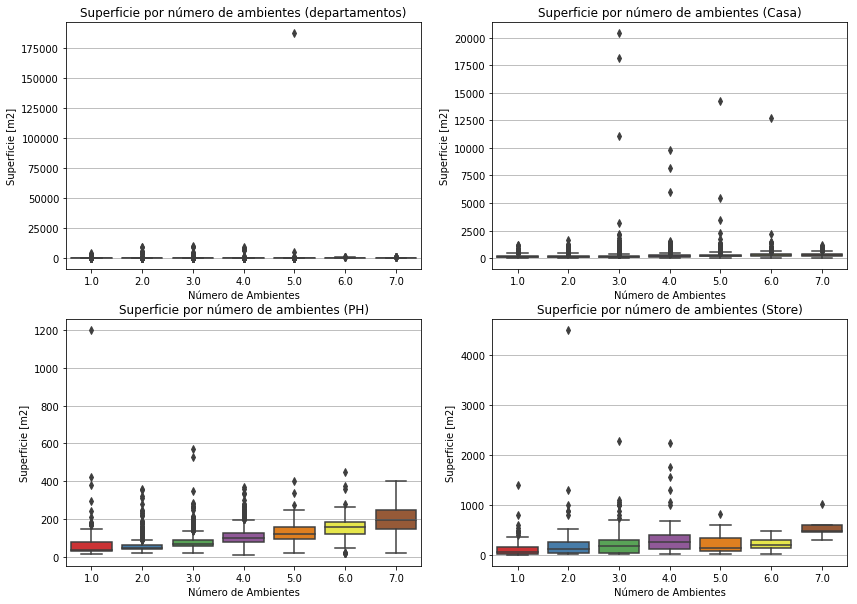

In [53]:
apartment_df = data.loc[data['property_type']=='apartment'].copy()
house_df = data.loc[data['property_type']=='house'].copy()
ph_df = data.loc[data['property_type']=='PH'].copy()
store_df = data.loc[data['property_type']=='store'].copy()

plt.figure(figsize=(14,10))
plt.subplot(221)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=apartment_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=apartment_df, palette="Set1")
plt.title('Superficie por número de ambientes (departamentos)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(222)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=house_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=house_df, palette="Set1")
plt.title('Superficie por número de ambientes (Casa)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(223)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=ph_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=ph_df, palette="Set1")
plt.title('Superficie por número de ambientes (PH)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(224)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=store_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=store_df, palette="Set1")
plt.title('Superficie por número de ambientes (Store)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')
#plt.savefig("../Images/Rooms-Before.png")

## Limpiando Superficies 

### apartment

In [54]:
sup_tot_limits_apt = []
sup_cub_limits_apt = []
for i in range(1,8,1):
    a=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='apartment')&(data['surface_total_in_m2'].notnull()),'surface_total_in_m2'])[1]
    sup_tot_limits_apt.append((10,a))
    b=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='apartment')&(data['surface_covered_in_m2'].notnull()),'surface_covered_in_m2'])[1]
    sup_cub_limits_apt.append((10,b))
print(sup_tot_limits_apt)
print(sup_cub_limits_apt)

for i in range(7):
    data.loc[(data['property_type']=='apartment')&(data['surface_total_in_m2']>sup_tot_limits_apt[i][1]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='apartment')&(data['surface_covered_in_m2']>sup_cub_limits_apt[i][1]),'surface_covered_in_m2']=np.nan
    data.loc[(data['property_type']=='apartment')&(data['surface_total_in_m2']<sup_tot_limits_apt[i][0]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='apartment')&(data['surface_covered_in_m2']<sup_cub_limits_apt[i][0]),'surface_covered_in_m2']=np.nan
apartment_df[['rooms','surface_total_in_m2','surface_covered_in_m2']].groupby('rooms').median()

[(10, 64.5), (10, 89.0), (10, 154.0), (10, 252.0), (10, 410.0), (10, 528.75), (10, 537.5)]
[(10, 55.0), (10, 75.0), (10, 122.5), (10, 210.0), (10, 360.0), (10, 501.875), (10, 477.5)]


,surface_total_in_m2,surface_covered_in_m2
rooms,,
1.0,37.0,34.0
2.0,51.0,46.0
3.0,78.0,70.0
4.0,110.0,100.0
5.0,175.0,148.0
6.0,215.0,192.0
7.0,233.0,215.0


### house

In [55]:
sup_tot_limits_hs = []
sup_cub_limits_hs = []
for i in range(1,8,1):
    a=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='house')&(data['surface_total_in_m2'].notnull()),'surface_total_in_m2'])[1]
    sup_tot_limits_hs.append((10,a))
    b=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='house')&(data['surface_covered_in_m2'].notnull()),'surface_covered_in_m2'])[1]
    sup_cub_limits_hs.append((10,b))
print(sup_tot_limits_hs)
print(sup_cub_limits_hs)

for i in range(7):
    data.loc[(data['property_type']=='house')&(data['surface_total_in_m2']>sup_tot_limits_hs[i][1]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='house')&(data['surface_covered_in_m2']>sup_cub_limits_hs[i][1]),'surface_covered_in_m2']=np.nan
    data.loc[(data['property_type']=='house')&(data['surface_total_in_m2']<sup_tot_limits_hs[i][0]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='house')&(data['surface_covered_in_m2']<sup_cub_limits_hs[i][0]),'surface_covered_in_m2']=np.nan
#apartment_df[['rooms','surface_total_in_m2','surface_covered_in_m2']].groupby('rooms').median()

[(10, 945.0), (10, 900.0), (10, 827.5), (10, 881.25), (10, 1125.375), (10, 1360.5), (10, 1585.375)]
[(10, 467.0), (10, 460.5), (10, 400.0), (10, 425.5), (10, 522.5), (10, 612.5), (10, 681.75)]


### PH

In [56]:
sup_tot_limits_ph = []
sup_cub_limits_ph = []
for i in range(1,6,1):
    a=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='PH')&(data['surface_total_in_m2'].notnull()),'surface_total_in_m2'])[1]
    sup_tot_limits_ph.append((10,a))
    b=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='PH')&(data['surface_covered_in_m2'].notnull()),'surface_covered_in_m2'])[1]
    sup_cub_limits_ph.append((10,b))
print(sup_tot_limits_ph)
print(sup_cub_limits_ph)

for i in range(5):
    data.loc[(data['property_type']=='PH')&(data['surface_total_in_m2']>sup_tot_limits_ph[i][1]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='PH')&(data['surface_covered_in_m2']>sup_cub_limits_ph[i][1]),'surface_covered_in_m2']=np.nan
    data.loc[(data['property_type']=='PH')&(data['surface_total_in_m2']<sup_tot_limits_ph[i][0]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='PH')&(data['surface_covered_in_m2']<sup_cub_limits_ph[i][0]),'surface_covered_in_m2']=np.nan
#apartment_df[['rooms','surface_total_in_m2','surface_covered_in_m2']].groupby('rooms').median()

[(10, 221.5), (10, 109.5), (10, 198.0), (10, 287.5), (10, 370.5)]
[(10, 148.375), (10, 90.0), (10, 138.0), (10, 197.5), (10, 257.5)]


### store

In [57]:
sup_tot_limits_str = []
sup_cub_limits_str = []
for i in range(1,5,1):
    a=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='store')&(data['surface_total_in_m2'].notnull()),'surface_total_in_m2'])[1]
    sup_tot_limits_str.append((10,a))
    b=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='store')&(data['surface_covered_in_m2'].notnull()),'surface_covered_in_m2'])[1]
    sup_cub_limits_str.append((10,b))
print(sup_tot_limits_str)
print(sup_cub_limits_str)

for i in range(4):
    data.loc[(data['property_type']=='store')&(data['surface_total_in_m2']>sup_tot_limits_str[i][1]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='store')&(data['surface_covered_in_m2']>sup_cub_limits_str[i][1]),'surface_covered_in_m2']=np.nan
    data.loc[(data['property_type']=='store')&(data['surface_total_in_m2']<sup_tot_limits_str[i][0]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='store')&(data['surface_covered_in_m2']<sup_cub_limits_str[i][0]),'surface_covered_in_m2']=np.nan
#apartment_df[['rooms','surface_total_in_m2','surface_covered_in_m2']].groupby('rooms').median()

[(10, 411.0), (10, 688.25), (10, 1029.5), (10, 1009.5)]
[(10, 393.75), (10, 588.625), (10, 703.25), (10, 825.625)]


Me armo un dataframe con los datos de apartment y en cada fila la superficie segun número de ambientes.

Text(0, 0.5, 'Superficie [m2]')

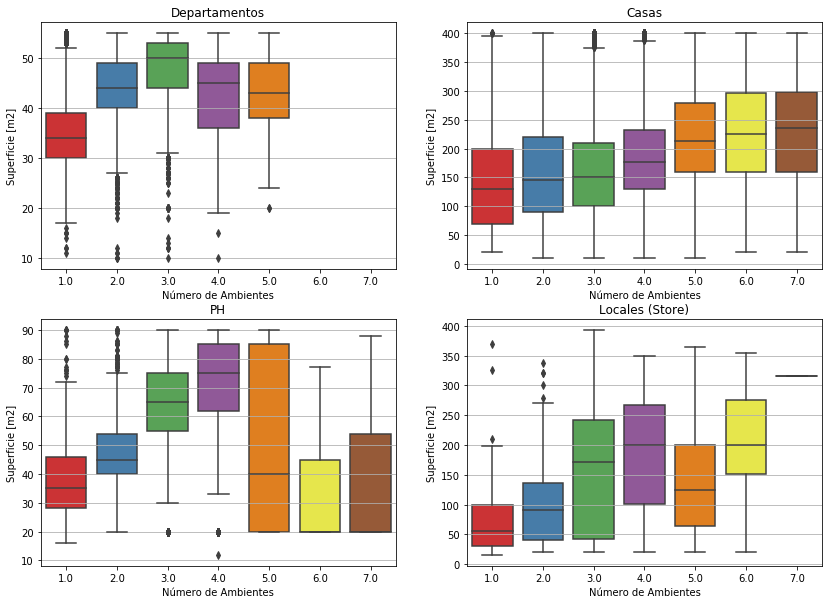

In [58]:
apartment_df = data.loc[data['property_type']=='apartment'].copy()
house_df = data.loc[data['property_type']=='house'].copy()
ph_df = data.loc[data['property_type']=='PH'].copy()
store_df = data.loc[data['property_type']=='store'].copy()

plt.figure(figsize=(14,10))
plt.subplot(221)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=apartment_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=apartment_df, palette="Set1")
plt.title('Departamentos')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(222)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=house_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=house_df, palette="Set1")
plt.title('Casas')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(223)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=ph_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=ph_df, palette="Set1")
plt.title('PH')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(224)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=store_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=store_df, palette="Set1")
plt.title('Locales (Store)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')
#plt.savefig("../Images/Rooms-After.png")

# Limpieza, búsqueda y llenado de columnas de Superficie

Superficies menores a 10m2 las tomamos como inválidas.
Lo mismo para superficie cubierta mayor a la total.

In [59]:
surface_cols = ['surface_covered_in_m2','surface_total_in_m2']


In [60]:
data.loc[data['surface_covered_in_m2']<10,'surface_covered_in_m2']=np.nan
data.loc[data['surface_total_in_m2']<10,'surface_total_in_m2']=np.nan
sup_inv_index = data.loc[data['surface_covered_in_m2']>data['surface_total_in_m2'],price_cols].index
data.loc[sup_inv_index,'surface_covered_in_m2']=np.nan
data.loc[sup_inv_index,'surface_total_in_m2']=np.nan
data.loc[sup_inv_index,'price_per_m2']=np.nan
data.loc[sup_inv_index,'price_usd_per_m2']=np.nan

data[price_cols].notnull().sum()

price                         89843
currency                      89843
price_aprox_local_currency    89843
price_aprox_usd               89843
surface_total_in_m2           45354
surface_covered_in_m2         58823
price_usd_per_m2              60988
price_per_m2                  78244
dtype: int64

## Funciones para búsqueda de superficie

In [61]:
def sup_total_search(text):
    pattern = r'(?:lote de|sup\.\s?total|superficie total|sup\.\s?tot\.)\s?:?\s*(\d+[,|\.]?\d*)\s?(?:m2|mts2|mtrs2|metros\s?cuadrados|m²)'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    sup_tot_lst = regex.findall(text)
    
    if not sup_tot_lst:
        return np.nan
    if len(sup_tot_lst)!=1:
        return np.nan
    sup=pd.to_numeric(sup_tot_lst[0].replace(',','.'))
    if sup<10:
        return np.nan
    return sup
def sup_total_search2(text):
    pattern = r'(\d+[,|\.]?\d*)\s?(?:m2|mts2|mtrs2|metros\s?cuadrados|m²)'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    sup_tot_lst = regex.findall(text)
    
    if not sup_tot_lst:
        return np.nan
    if len(sup_tot_lst)>1:
        sup_lst = [pd.to_numeric(item.replace(',','.')) for item in sup_tot_lst]
        if not sup_lst:
            return np.nan
        elif len(sup_lst)>1:
            return np.nan
        elif sup_lst<10:
            return np.nan
        else:
            return sup_lst[0]
        
    if len(sup_tot_lst)==1:
        return pd.to_numeric(sup_tot_lst[0].replace(',','.'))

def sup_cub_search(text):
    pattern = r'(?:superficie\s?cubierta:?|sup\.?\s?cub.?:?|sub\.?\s?cubierta:?|metros.\s?cubiertos:?|cub\.?)\s?:?\s?(\d+,?\.?\d*)\s?(?:m2|mt2|mtrs2|mtrs\.?|mts\.?||m²)'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    sup_cub_lst = regex.findall(text)
    if not sup_cub_lst:
        return np.nan
    sup_cub_lst = [item.replace(',','.') for item in sup_cub_lst]
    if len(sup_cub_lst)==1:
        sup=pd.to_numeric(sup_cub_lst[0])
        if sup<10:
            return np.nan
        else:
            return sup
    else:
        return np.nan
        #return(max(pd.to_numeric(sup_cub_lst)))

def sup_cub_search2(text):
    pattern = r'(\d+,?\.?\d*)\s?(?:m2|mtrs2|mtrs\.?|mts\.?|m²|metros|metros\s?cuadrados|metros\s?cuadrados\s?de|),?\s?(?:construidos|cubiertos|cub\.?)'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    sup_cub_lst = regex.findall(text)
    if not sup_cub_lst:
        return np.nan
    sup_cub_lst = [item.replace(',','.') for item in sup_cub_lst]
    if len(sup_cub_lst)==1:
        sup=pd.to_numeric(sup_cub_lst[0])
        if sup<10:
            return np.nan
        else:
            return sup
    else:
        return np.nan
        #return(max(pd.to_numeric(sup_cub_lst)))
    
def clean_temp_col(df,tempCol):
    """Cleans a tempCol column from a df dataframe. Writes nan on every row.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe you want to clean a temporary column.
    tempCol: str
        The name passed as a string of the column to clean.
    """
    df.loc[:,tempCol]=np.nan

def new_found(df,tempCol,cleanCol):
    """Shows a message about the new data found.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to take data from.
    tempCol: str
        The name passed as a string of the temporary column.
    cleanCol: str
        the name passed as a string of the clean column.
    """
    print("Nuevos: {}.".format(df[tempCol].notnull().sum()))
    print("Total: {}.".format(df[cleanCol].notnull().sum()))


## Búsqueda de superficie cubierta

In [62]:
sup_cub_func_lst = [sup_cub_search,sup_cub_search2]
col_lst = ['title','description']
for col in col_lst:
    for func in sup_cub_func_lst:
        data["surface_covered_in_m2"].fillna(value=data.loc[data['surface_covered_in_m2'].isna(),col].apply(func), inplace=True)

In [63]:
#data.loc[(data['surface_covered_in_m2'].notnull())&(data['surface_covered_in_m2']>data['surface_total_in_m2']),price_cols]
data.loc[(data['surface_covered_in_m2'].notnull())&(data['price_aprox_usd'].notnull())&(data['price_per_m2'].isna()),price_cols].head(10)

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
15,250000.00,USD,4411125.0,250000.00,164.0,115.23,1524.390244,NaN
144,147000.00,USD,2593741.5,147000.00,NaN,120.00,NaN,NaN
290,115000.00,USD,2029117.5,115000.00,NaN,65.00,1769.230769,NaN
369,190000.00,USD,3352455.0,190000.00,NaN,180.00,NaN,NaN
669,65000.00,USD,1146892.5,65000.00,NaN,70.00,928.571429,NaN
675,130000.00,USD,2293785.0,130000.00,NaN,190.00,NaN,NaN
951,320000.00,USD,5646240.0,320000.00,NaN,220.00,NaN,NaN
1017,36454.38,USD,643219.3,36454.38,NaN,77.00,NaN,NaN
1060,120000.00,USD,2117340.0,120000.00,60.0,44.00,2000.000000,NaN
1432,40000.00,USD,705780.0,40000.00,40.0,40.00,1000.000000,NaN


$price\_usd\_per\_m2 = \frac{price\_aprox\_usd}{surface\_total\_in\_m2}$

$price\_per\_m2 = \frac{price}{surface\_covered\_in\_m2}$


Con estos valores y las anteriores relaciones, completo valores de **price_usd_per_m2** y **price_per_m2**:

In [64]:
completar_parspm2_index = data.loc[(data['price_per_m2'].isna())&(data['price'].notnull())&(data['surface_covered_in_m2'].notnull())&(data['surface_covered_in_m2']!=0),price_cols].index
data.loc[completar_parspm2_index,'price_per_m2'] = data.loc[completar_parspm2_index,'price'] / data.loc[completar_parspm2_index,'surface_covered_in_m2']

data[price_cols].notnull().sum()

price                         89843
currency                      89843
price_aprox_local_currency    89843
price_aprox_usd               89843
surface_total_in_m2           45354
surface_covered_in_m2         61756
price_usd_per_m2              60988
price_per_m2                  78729
dtype: int64

In [65]:
data.loc[(data['surface_covered_in_m2'].notnull())&(data['price_aprox_usd'].isna())&(data['price_per_m2'].notnull()),price_cols]

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2


No puedo completar nada más con estos valores de superficie cubierta.

## Búsqueda de superficie total

In [66]:
sup_tot_func_lst = [sup_total_search,sup_total_search2]
col_lst = ['title','description']
for col in col_lst:
    for func in sup_tot_func_lst:
        data["surface_total_in_m2"].fillna(value=data.loc[data['surface_total_in_m2'].isna(),col].apply(func), inplace=True)

In [67]:
data.loc[(data['price_aprox_usd'].notnull())&(data['surface_total_in_m2'].notnull())&(data['price_usd_per_m2'].isna()),price_cols]

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
77,150000.00,USD,2646675.00,150000.00,85.00,NaN,NaN,1764.705882
79,118000.00,USD,2082051.00,118000.00,42.00,42.0,NaN,2809.523810
109,55000.00,USD,970447.50,55000.00,60.00,60.0,NaN,916.666667
138,130000.00,USD,2293785.00,130000.00,842.00,100.0,NaN,1300.000000
143,74600.00,USD,1316279.70,74600.00,36.00,36.0,NaN,2072.222222
144,147000.00,USD,2593741.50,147000.00,379.00,120.0,NaN,1225.000000
152,1250000.00,USD,22055625.00,1250000.00,612.00,NaN,NaN,2042.483660
161,260000.00,USD,4587570.00,260000.00,11.00,200.0,NaN,1300.000000
174,82664.53,USD,1458574.29,82664.53,1910.00,NaN,NaN,1450.254927
267,95000.00,USD,1676227.50,95000.00,360.00,NaN,NaN,NaN


## Filtro de superficies encontradas por outliers

In [68]:
for i in range(7):
    data.loc[(data['property_type']=='apartment')&(data['surface_total_in_m2']>sup_tot_limits_apt[i][1]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='apartment')&(data['surface_covered_in_m2']>sup_cub_limits_apt[i][1]),'surface_covered_in_m2']=np.nan
    data.loc[(data['property_type']=='apartment')&(data['surface_total_in_m2']<sup_tot_limits_apt[i][0]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='apartment')&(data['surface_covered_in_m2']<sup_cub_limits_apt[i][0]),'surface_covered_in_m2']=np.nan

for i in range(7):
    data.loc[(data['property_type']=='house')&(data['surface_total_in_m2']>sup_tot_limits_hs[i][1]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='house')&(data['surface_covered_in_m2']>sup_cub_limits_hs[i][1]),'surface_covered_in_m2']=np.nan
    data.loc[(data['property_type']=='house')&(data['surface_total_in_m2']<sup_tot_limits_hs[i][0]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='house')&(data['surface_covered_in_m2']<sup_cub_limits_hs[i][0]),'surface_covered_in_m2']=np.nan

for i in range(5):
    data.loc[(data['property_type']=='PH')&(data['surface_total_in_m2']>sup_tot_limits_ph[i][1]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='PH')&(data['surface_covered_in_m2']>sup_cub_limits_ph[i][1]),'surface_covered_in_m2']=np.nan
    data.loc[(data['property_type']=='PH')&(data['surface_total_in_m2']<sup_tot_limits_ph[i][0]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='PH')&(data['surface_covered_in_m2']<sup_cub_limits_ph[i][0]),'surface_covered_in_m2']=np.nan

for i in range(4):
    data.loc[(data['property_type']=='store')&(data['surface_total_in_m2']>sup_tot_limits_str[i][1]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='store')&(data['surface_covered_in_m2']>sup_cub_limits_str[i][1]),'surface_covered_in_m2']=np.nan
    data.loc[(data['property_type']=='store')&(data['surface_total_in_m2']<sup_tot_limits_str[i][0]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='store')&(data['surface_covered_in_m2']<sup_cub_limits_str[i][0]),'surface_covered_in_m2']=np.nan

$price\_usd\_per\_m2 = \frac{price\_aprox\_usd}{surface\_total\_in\_m2}$

$price\_per\_m2 = \frac{price}{surface\_covered\_in\_m2}$


Con estos valores y las anteriores relaciones, completo valores de **price_usd_per_m2** y **price_per_m2**:

In [69]:
completar_pusdpm2_index = data.loc[(data['price_usd_per_m2'].isna())&(data['price_aprox_usd'].notnull())&(data['surface_total_in_m2'].notnull())&(data['surface_total_in_m2']!=0),price_cols].index
data.loc[completar_pusdpm2_index,'price_usd_per_m2'] = data.loc[completar_pusdpm2_index,'price_aprox_usd'] / data.loc[completar_pusdpm2_index,'surface_total_in_m2']

data[price_cols].notnull().sum()

price                         89843
currency                      89843
price_aprox_local_currency    89843
price_aprox_usd               89843
surface_total_in_m2           49883
surface_covered_in_m2         59668
price_usd_per_m2              64165
price_per_m2                  78729
dtype: int64

In [70]:
data.loc[(data['price_aprox_usd'].isna())&(data['surface_total_in_m2'].notnull())&(data['price_usd_per_m2'].notnull()),price_cols]

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2


No puedo completar nada más con estos valores de superficie total.

In [71]:
data[price_cols].notnull().sum()

price                         89843
currency                      89843
price_aprox_local_currency    89843
price_aprox_usd               89843
surface_total_in_m2           49883
surface_covered_in_m2         59668
price_usd_per_m2              64165
price_per_m2                  78729
dtype: int64

Text(0, 0.5, 'Superficie [m2]')

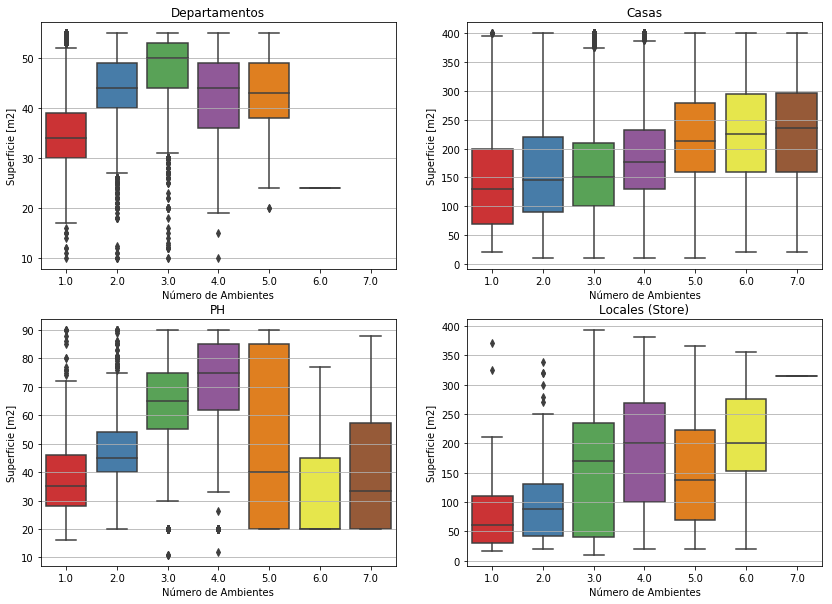

In [72]:
apartment_df = data.loc[data['property_type']=='apartment'].copy()
house_df = data.loc[data['property_type']=='house'].copy()
ph_df = data.loc[data['property_type']=='PH'].copy()
store_df = data.loc[data['property_type']=='store'].copy()

plt.figure(figsize=(14,10))
plt.subplot(221)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=apartment_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=apartment_df, palette="Set1")
plt.title('Departamentos')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(222)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=house_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=house_df, palette="Set1")
plt.title('Casas')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(223)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=ph_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=ph_df, palette="Set1")
plt.title('PH')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(224)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=store_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=store_df, palette="Set1")
plt.title('Locales (Store)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')
#plt.savefig("../Images/Rooms-After.png")

In [73]:
data['surface_uncovered_in_m2']=data['surface_total_in_m2']-data['surface_covered_in_m2']
price_cols.append('surface_uncovered_in_m2')
data[price_cols].notnull().sum()

price                         89843
currency                      89843
price_aprox_local_currency    89843
price_aprox_usd               89843
surface_total_in_m2           49883
surface_covered_in_m2         59668
price_usd_per_m2              64165
price_per_m2                  78729
surface_uncovered_in_m2       41734
dtype: int64

La estrategia para imputar valores de superficie es con un $Construction\:Index = \frac{Superficie\:Cubierta}{Superficie\:Total}$ el cual se calcula para cada 'place_name'.

Entonces, se dropean las filas donde no haya ni Superficia Cubierta, ni Superficie Total para un determinado 'place_name'.


In [74]:
sup_por_lugar = data[['surface_covered_in_m2','surface_total_in_m2','place_name']].groupby('place_name').count().reset_index()
lugares_sin_constindx = sup_por_lugar.loc[(sup_por_lugar['surface_covered_in_m2']==0)&(sup_por_lugar['surface_total_in_m2']==0)]
lugares_sin_constindx = lugares_sin_constindx['place_name'].to_list()
lugares_sin_constindx

sup_drop_ind=[]
for lugar in lugares_sin_constindx:
    sup_drop_ind.append(data.loc[data['place_name']==lugar].index.values[0])
sup_drop_ind = pd.Index(sup_drop_ind)
print("Se van a dropear {} por falta de datos de superficie.".format(sup_drop_ind.size))
data.drop(index=sup_drop_ind,inplace=True)

Se van a dropear 74 por falta de datos de superficie.


Si no se tiene el dato de superficie cubierta ni superficie total también se debe dropear:

In [75]:
data.notnull().sum()

operation                     103417
property_type                 103417
place_name                    103417
place_with_parent_names       103417
country_name                  103417
state_name                    103417
geonames_id                    87019
lat-lon                        63201
price                          89804
currency                       89804
price_aprox_local_currency     89804
price_aprox_usd                89804
surface_total_in_m2            49883
surface_covered_in_m2          59668
price_usd_per_m2               64150
price_per_m2                   78714
floor                           7596
rooms                         103417
expenses                       11912
properati_url                 103417
description                   103417
title                         103417
image_thumbnail               101577
Pais                          103417
Provincia                     103417
Ciudad                        100668
Barrio                         60125
S

In [76]:
data.replace([np.inf, -np.inf], np.nan,inplace=True)

In [77]:
data.loc[data['surface_covered_in_m2']<10,'surface_covered_in_m2']=np.nan
data.loc[data['surface_total_in_m2']<10,'surface_total_in_m2']=np.nan
sup_inv_index = data.loc[data['surface_covered_in_m2']>data['surface_total_in_m2'],price_cols].index
data.loc[sup_inv_index,'surface_covered_in_m2']=np.nan
data.loc[sup_inv_index,'surface_total_in_m2']=np.nan
data.loc[sup_inv_index,'price_per_m2']=np.nan
data.loc[sup_inv_index,'price_usd_per_m2']=np.nan

In [78]:
no_sup_drop = data.loc[(data['surface_covered_in_m2'].isna())&(data['surface_total_in_m2'].isna())].index
print("Se va a dropear {} por falta de ambas superficies.".format(no_sup_drop.size))
data.drop(index=no_sup_drop,inplace=True)

Se va a dropear 36079 por falta de ambas superficies.


In [79]:
data.notnull().sum()

operation                     67338
property_type                 67338
place_name                    67338
place_with_parent_names       67338
country_name                  67338
state_name                    67338
geonames_id                   56152
lat-lon                       40124
price                         60391
currency                      60391
price_aprox_local_currency    60391
price_aprox_usd               60391
surface_total_in_m2           49404
surface_covered_in_m2         59189
price_usd_per_m2              47413
price_per_m2                  56754
floor                          4263
rooms                         67338
expenses                       7046
properati_url                 67338
description                   67338
title                         67338
image_thumbnail               66177
Pais                          67338
Provincia                     67338
Ciudad                        65690
Barrio                        39049
Sub-Barrio                  

<h1><font color='red'>Filtro de outliers multivariados de Superficie Cubierta y Total (por número de ambientes y por tipo de propiedad)</font></h1>

Agregar drop de filas donde no hay superficie total ni superficie cubierta en un lugar.

**Hecho**

<h1><font color='red'>Filtro de outliers de $/m2 para Capital, GBA, Resto BsAs, Cordoba, Santa Fe, Resto del País</font></h1>

En primer lugar vamos a Clasificar el Dataset por zonas, las cuales vamos a utilizar luego para los modelos de la segunda parte del trabajo

In [80]:
data.Provincia.unique()

array(['Capital Federal', 'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Córdoba', 'Bs.As. G.B.A. Zona Oeste',
       'Bs.As. G.B.A. Zona Sur', 'Santa Fe', 'Misiones',
       'Buenos Aires Interior', 'Neuquén', 'Río Negro', 'San Luis',
       'Mendoza', 'Corrientes', 'Tucumán', 'Chaco', 'Salta', 'Chubut',
       'Tierra Del Fuego', 'San Juan', 'La Pampa', 'Santa Cruz',
       'Santiago Del Estero', 'Catamarca', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [81]:
#división por zonas para el análisis
zonas = {"Provincia":['Capital Federal','Buenos Aires Costa Atlántica','Entre Ríos',\
                     'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',\
                     'Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur', 'Misiones',\
                     'Buenos Aires Interior', 'Salta', 'Neuquén', 'Río Negro',\
                     'San Luis', 'Mendoza', 'Corrientes', 'Chubut', 'Tucumán', 'Chaco',\
                     'San Juan', 'La Pampa', 'Santa Cruz', 'Tierra Del Fuego',\
                     'Catamarca', 'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],\
        "Zona":["CABA", 'BsAs', "Resto País",\
                "GBA", 'Santa Fe', 'Córdoba',\
                'GBA', 'GBA', 'Resto País',\
                'BsAs', 'Resto País','Resto País','Resto País',\
                'Resto País','Resto País','Resto País','Resto País','Resto País',\
                'Resto País','Resto País','Resto País','Resto País',\
                'Resto País','Resto País','Resto País','Resto País','Resto País','Resto País']
       }


In [82]:
df_zonas=pd.DataFrame.from_dict(zonas)


In [83]:
data = data.merge(df_zonas,on="Provincia",how="left")
data=data.rename(columns = {'Zona y':'Zona'})
data.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,price,currency,...,Pais,Provincia,Ciudad,Barrio,Sub-Barrio,complete_place_name,lat,lon,surface_uncovered_in_m2,Zona
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",62000.0,USD,...,Argentina,Capital Federal,Capital Federal,Mataderos,None,"Argentina, Capital Federal, Mataderos",-34.661824,-58.508839,15.0,CABA
1,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",72000.0,USD,...,Argentina,Capital Federal,Capital Federal,Mataderos,None,"Argentina, Capital Federal, Mataderos",-34.652262,-58.522982,0.0,CABA
2,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",64000.0,USD,...,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,None,"Argentina, Buenos Aires Costa Atlántica, Mar d...",-38.002626,-57.549447,0.0,BsAs
3,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",NaN,NaN,...,Argentina,Entre Ríos,Gualeguaychú,None,None,"Argentina, Entre Ríos, Gualeguaychú",-33.014071,-58.519828,NaN,Resto País
4,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",130000.0,USD,...,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,Munro,None,"Argentina, Bs.As. G.B.A. Zona Norte, Vicente L...",-34.532957,-58.521782,28.0,GBA


In [84]:
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'price',
       'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'Pais', 'Provincia',
       'Ciudad', 'Barrio', 'Sub-Barrio', 'complete_place_name', 'lat', 'lon',
       'surface_uncovered_in_m2', 'Zona'],
      dtype='object')

## Estado Inicial de OUTLIERS

Text(0, 0.5, 'Precio USD/m2')

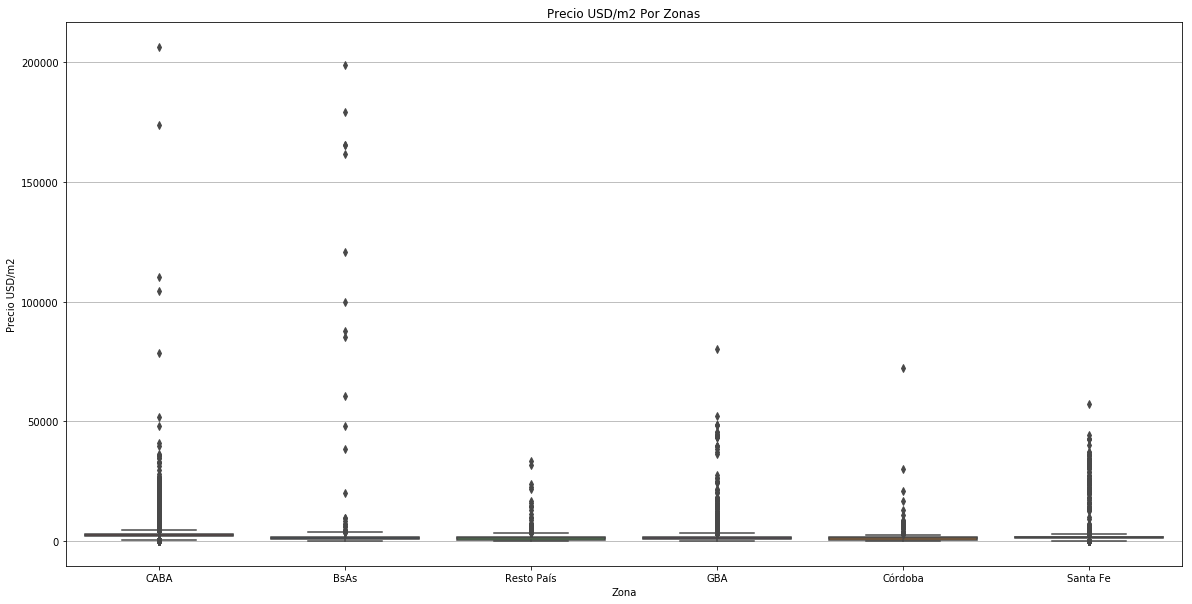

In [85]:
plt.figure(figsize=(20,10))
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=apartment_df, palette="Set1")
ax = sns.boxplot(x="Zona", y="price_usd_per_m2", data=data, palette="Set1")
plt.title('Precio USD/m2 Por Zonas')
plt.xlabel('Zona')
plt.ylabel('Precio USD/m2')


## Análisis Capital Federal

### Cuando se realizó la corrección inicial, comprobamos que Puerto Madero tiene un precio por m2 superior al resto de Capital. Para que esos valores no se licuen con el resto de la zona, vamos a realizar el cálculo de outliers para CABA con/sin Pto Madero, y este último en forma individual

In [86]:
iqr_values_CABA=calculate_iqr_values(data.loc[(data['price_usd_per_m2'].notnull())&(data['Zona']=='CABA'),'price_usd_per_m2'])
print(data.loc[(data['Zona']=='CABA')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'].apply(check_outliers,args=iqr_values_CABA).unique())
print(iqr_values_CABA)

[1127.27272727 1309.09090909 3066.66666667 ... 2310.81081081 2387.09677419
 2858.69565217]
(444.444444444445, 4474.074074074074)


In [87]:
data.loc[data["place_name"]=="Puerto madero",'price_usd_per_m2'].describe()

count       80.000000
mean      6052.689221
std       5312.126461
min       2964.912281
25%       5000.000000
50%       5436.689550
75%       5962.500000
max      52000.000000
Name: price_usd_per_m2, dtype: float64

In [88]:
iqr_values_PtoMadero=calculate_iqr_values(data.loc[(data['price_usd_per_m2'].notnull())&(data['place_name']=='Puerto madero'),'price_usd_per_m2'])
#print(data.loc[(data['place_name']=='Puerto madero')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'].apply(check_outliers,args=iqr_values_PtoMadero).unique())
print(iqr_values_PtoMadero)

(3556.25, 7406.25)


Habíamos detectado previamente que "Puerto Madero" es el barrio mas caro de CABA , con valores promedios de uSD 6.028, mirando hacia dentro de su descripción vemos que valor límite superior está establecido en 8889USD/m2. Vamos a limpiar primero este barrio y luego volver a correr CABA sin él

In [89]:
data.loc[(data['place_name']=='Puerto madero')&(data['price_usd_per_m2']>iqr_values_PtoMadero[1]),'price_usd_per_m2']=np.nan


In [90]:
data.loc[data["place_name"]=="Puerto madero",'price_usd_per_m2'].describe()

count      77.000000
mean     5364.443540
std       864.145722
min      2964.912281
25%      5000.000000
50%      5409.836066
75%      5950.000000
max      7256.304348
Name: price_usd_per_m2, dtype: float64

In [91]:
iqr_values_CABA_sinPM=calculate_iqr_values(data.loc[(data['price_usd_per_m2'].notnull())&(data['Zona']=='CABA')&(data['place_name']!='Puerto madero'),'price_usd_per_m2'])
print(data.loc[(data['Zona']=='CABA')&(data['place_name']!='Puerto madero')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'].apply(check_outliers,args=iqr_values_CABA_sinPM).unique())
print(iqr_values_CABA_sinPM)

[1127.27272727 1309.09090909 3066.66666667 ... 2310.81081081 2387.09677419
 2858.69565217]
(459.6306106174536, 4440.298188653451)


In [92]:
data.loc[(data['Zona']=='CABA')&(data['place_name']!='Puerto madero')&(data['price_usd_per_m2']>iqr_values_CABA_sinPM[1]),'price_usd_per_m2']=np.nan


In [93]:
data.loc[(data['Zona']=='CABA')&(data['place_name']!='Puerto madero')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'].describe()


count    12181.000000
mean      2344.794863
std        738.359662
min         62.065932
25%       1907.272727
50%       2343.750000
75%       2800.000000
max       4435.644444
Name: price_usd_per_m2, dtype: float64

Text(0, 0.5, 'Precio USD/m2')

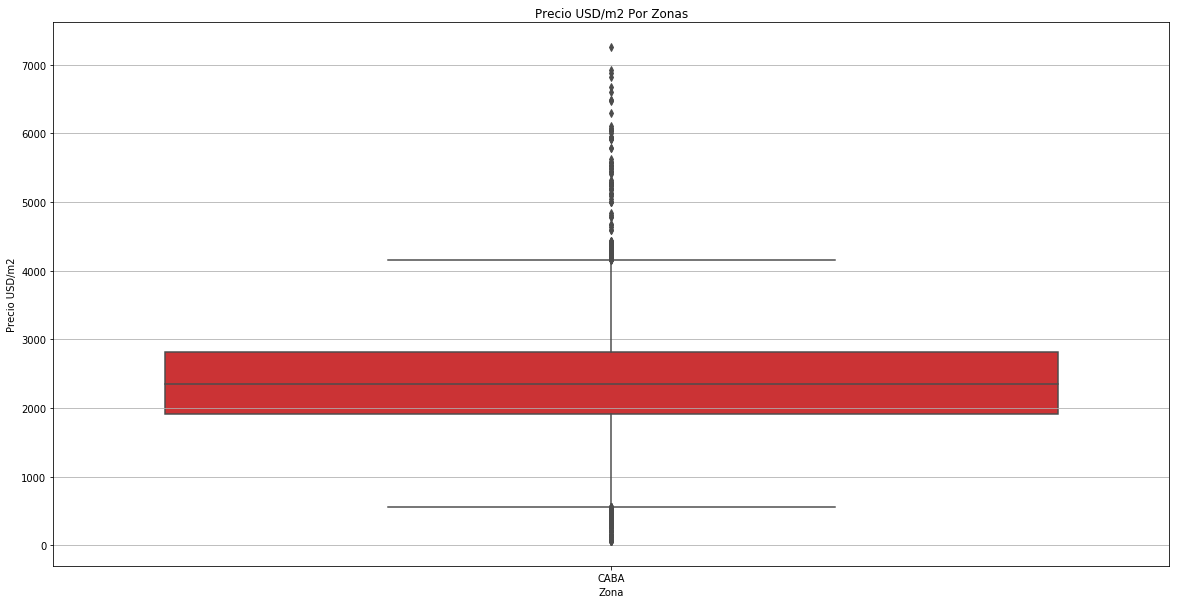

In [94]:
plt.figure(figsize=(20,10))
plt.grid(True)  

ax = sns.boxplot(x="Zona", y="price_usd_per_m2", data=data.loc[data["Zona"]=="CABA"], palette="Set1")
plt.title('Precio USD/m2 Por Zonas')
plt.xlabel('Zona')
plt.ylabel('Precio USD/m2')

## Cálculo Outliers GBA

In [95]:
iqr_values_GBANORTE=calculate_iqr_values(data.loc[(data['price_usd_per_m2'].notnull())&(data['Provincia']=='Bs.As. G.B.A. Zona Norte'),'price_usd_per_m2'])
print(data.loc[(data['Provincia']=='Bs.As. G.B.A. Zona Norte')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'].apply(check_outliers,args=iqr_values_GBANORTE).unique())
print(iqr_values_GBANORTE)

[1226.41509434 2948.71794872 1524.3902439  ... 1370.55837563  887.09677419
 1383.33333333]
(-684.8930559056796, 3731.6905505245395)


In [96]:
iqr_values_GBASUR=calculate_iqr_values(data.loc[(data['price_usd_per_m2'].notnull())&(data['Provincia']=='Bs.As. G.B.A. Zona Sur'),'price_usd_per_m2'])
print(data.loc[(data['Provincia']=='Bs.As. G.B.A. Zona Sur')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'].apply(check_outliers,args=iqr_values_GBASUR).unique())
print(iqr_values_GBASUR)

[1586.20689655 1263.15789474 2062.5        ... 1688.88888889 1790.75163265
 1439.02439024]
(-504.0507479693141, 3246.8234487815885)


In [97]:
iqr_values_GBAOESTE=calculate_iqr_values(data.loc[(data['price_usd_per_m2'].notnull())&(data['Provincia']=='Bs.As. G.B.A. Zona Oeste'),'price_usd_per_m2'])
print(data.loc[(data['Provincia']=='Bs.As. G.B.A. Zona Oeste')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'].apply(check_outliers,args=iqr_values_GBAOESTE).unique())
print(iqr_values_GBAOESTE)

[1450.          785.49848943 1558.13953488 ...  216.66666667  618.18181818
 1255.17241379]
(-951.6464198782962, 3154.7048174442193)


Los valores expresados tienen lógica. Aplicamos los cortes de los IQR

In [98]:
data.loc[(data['Provincia']=='Bs.As. G.B.A. Zona Norte')&(data['price_usd_per_m2']>iqr_values_GBANORTE[1]),'price_usd_per_m2']=np.nan
data.loc[(data['Provincia']=='Bs.As. G.B.A. Zona Sur')&(data['price_usd_per_m2']>iqr_values_GBAOESTE[1]),'price_usd_per_m2']=np.nan
data.loc[(data['Provincia']=='Bs.As. G.B.A. Zona Oeste')&(data['price_usd_per_m2']>iqr_values_GBASUR[1]),'price_usd_per_m2']=np.nan

Text(0, 0.5, 'Precio USD/m2')

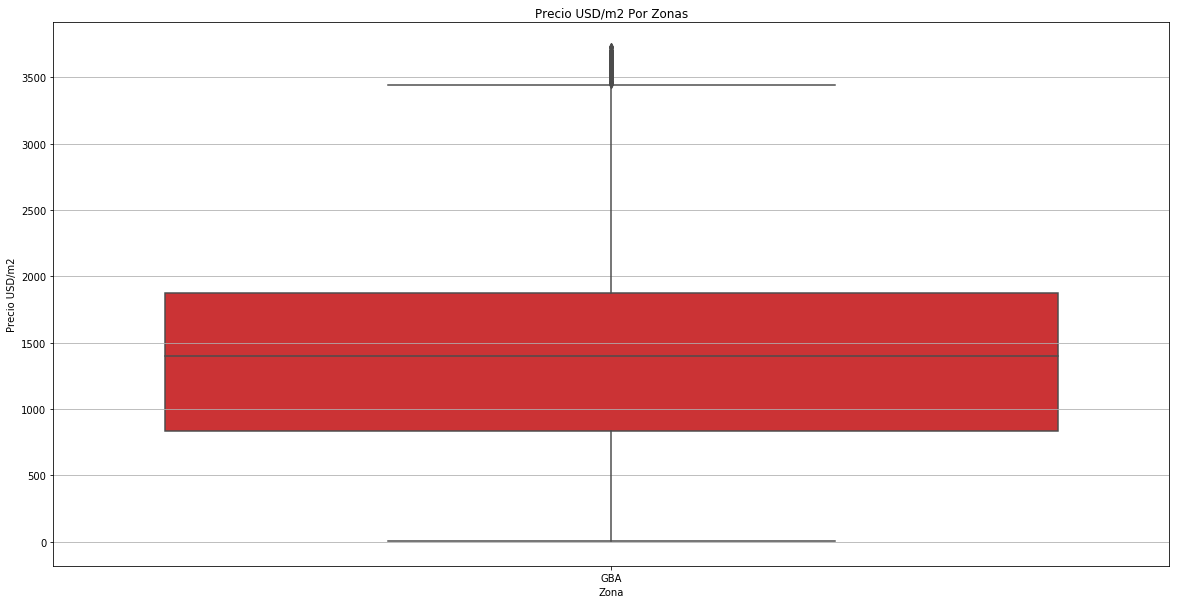

In [99]:
plt.figure(figsize=(20,10))
plt.grid(True)  

ax = sns.boxplot(x="Zona", y="price_usd_per_m2", data=data.loc[data["Zona"]=="GBA"], palette="Set1")
plt.title('Precio USD/m2 Por Zonas')
plt.xlabel('Zona')
plt.ylabel('Precio USD/m2')



Text(0, 0.5, 'Precio USD/m2')

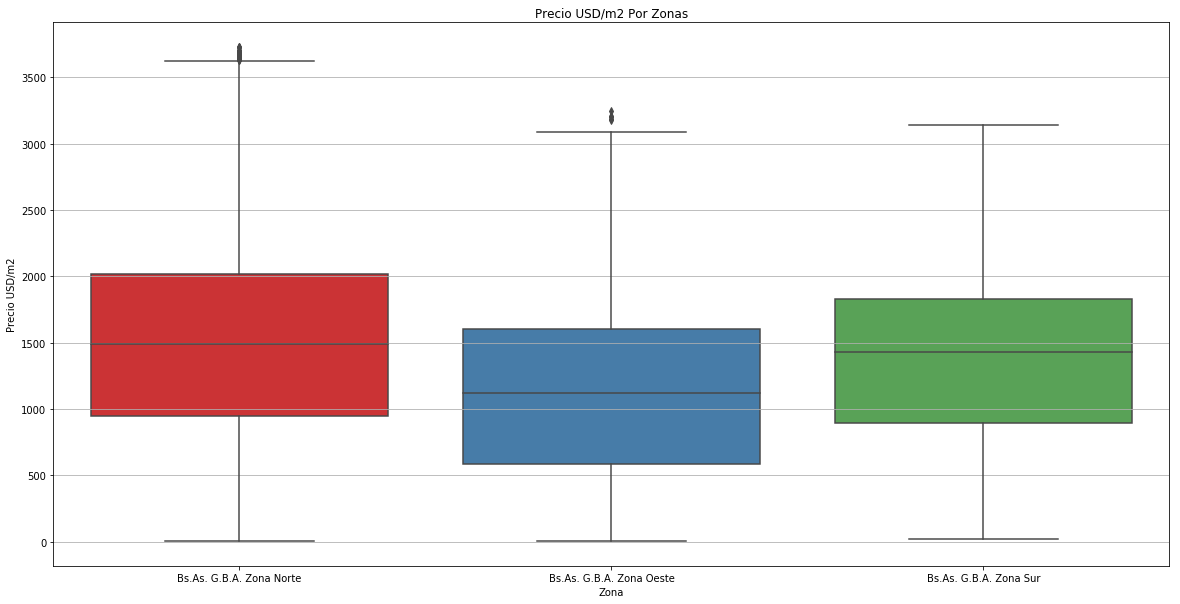

In [100]:

plt.figure(figsize=(20,10))
plt.grid(True)  

ax = sns.boxplot(x="Provincia", y="price_usd_per_m2", data=data.loc[data["Zona"]=="GBA"], palette="Set1")
plt.title('Precio USD/m2 Por Zonas')
plt.xlabel('Zona')
plt.ylabel('Precio USD/m2')


## Cálculo Outliers Resto de la Provincia de BsAs

In [101]:
iqr_values_BA=calculate_iqr_values(data.loc[(data['price_usd_per_m2'].notnull())&(data['Zona']=='BsAs'),'price_usd_per_m2'])
print(data.loc[(data['Zona']=='BsAs')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'].apply(check_outliers,args=iqr_values_BA).unique())
print(iqr_values_BA)

[1828.57142857 1054.21686747 1758.62068966 ...  895.         1897.43589744
 2176.2972973 ]
(-1167.598290598291, 3769.3589743589746)


In [102]:
data.loc[(data['Zona']=='BsAs')&(data['price_usd_per_m2']>iqr_values_BA[1]),'price_usd_per_m2']=np.nan

## Cálculo Outliers de la Provincia de Córdoba

In [103]:
iqr_values_CBA=calculate_iqr_values(data.loc[(data['price_usd_per_m2'].notnull())&(data['Zona']=='Córdoba'),'price_usd_per_m2'])
print(data.loc[(data['Zona']=='Córdoba')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'].apply(check_outliers,args=iqr_values_CBA).unique())
print(iqr_values_CBA)

[ 616.9204      934.72786667  238.3556     ... 1625.34807692 1684.7536
 1690.362     ]
(-735.1039030303021, 2856.6981818181803)


In [104]:
data.loc[(data['Zona']=='Córdoba')&(data['price_usd_per_m2']>iqr_values_CBA[1]),'price_usd_per_m2']=np.nan

## Cálculo Outliers de la Provincia de Santa Fé

In [105]:
iqr_values_SF=calculate_iqr_values(data.loc[(data['price_usd_per_m2'].notnull())&(data['Zona']=='Santa Fe'),'price_usd_per_m2'])
print(data.loc[(data['Zona']=='Santa Fe')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'].apply(check_outliers,args=iqr_values_SF).unique())
print(iqr_values_SF)

[ 276.49769585  719.02148718 2022.12805556 ... 1402.0919     1933.33333333
 1744.82518519]
(234.8174332264955, 2803.5025400641025)


In [106]:
data.loc[(data['Zona']=='Santa Fe')&(data['price_usd_per_m2']>iqr_values_SF[1]),'price_usd_per_m2']=np.nan

## Cálculo Outliers del Resto del Pais

In [107]:
data.loc[data['Zona']=='Resto País','price_usd_per_m2'].describe()

count     1316.000000
mean      1410.949349
std       2098.476352
min          5.608367
25%        556.820091
50%       1111.111111
75%       1679.516807
max      33333.333333
Name: price_usd_per_m2, dtype: float64

Se tratan de 1323 Valores que serán tratados en un mismo grupo. Entendiendo las diferencias económicas dadas por la extensión de la geografía pero intentaremos luego obtener características en común que nos permitan hacer predicciones hacia el interior del conjunto

In [108]:
iqr_values_RestoPais=calculate_iqr_values(data.loc[(data['price_usd_per_m2'].notnull())&(data['Zona']=='Resto País'),'price_usd_per_m2'])
print(data.loc[(data['Zona']=='Resto País')&(data['price_usd_per_m2'].notnull()),'price_usd_per_m2'].apply(check_outliers,args=iqr_values_RestoPais).unique())
print(iqr_values_RestoPais)


[ 888.88888889  423.88822674  189.98533537  380.95238095  887.5739645
  416.66666667  199.40862222  640.         3130.43478261 2777.77777778
 2450.          373.89115789  392.58571579  716.6247193   400.59766917
 2117.64705882  607.57313158 1558.44155844  163.15250526  486.05850526
  364.54387895 2804.18368421  583.60655738  764.77736842  215.70643725
  690.26059919  388.27158704 1078.53218623  684.29092354  912.99003672
  137.65992632  356.69216463  618.85433031  414.53150114  266.39745
  729.08775789  529.67914035  369.14274019  358.93551158  210.31377632
  186.94557895  397.25935526  701.04592105  240.          228.91566265
  336.73469388  850.          604.3956044  1075.          125.
 2282.60869565  110.           72.11538462  183.33333333  454.50073394
 2400.          841.255       360.53789286  106.06060606 3000.
 2214.28571429 1612.90322581 1888.88888889  337.47779751  160.
  194.73497685  141.49550459 2019.01228571  826.87467949  539.26596154
 1750.          183.13036735  866.

In [109]:
data.loc[(data['Zona']=='Resto País')&(data['price_usd_per_m2']>iqr_values_RestoPais[1]),'price_usd_per_m2']=np.nan

## Estado Final de la Distribución de Precios en USD por M2 por Zona

Text(0, 0.5, 'Precio USD/m2')

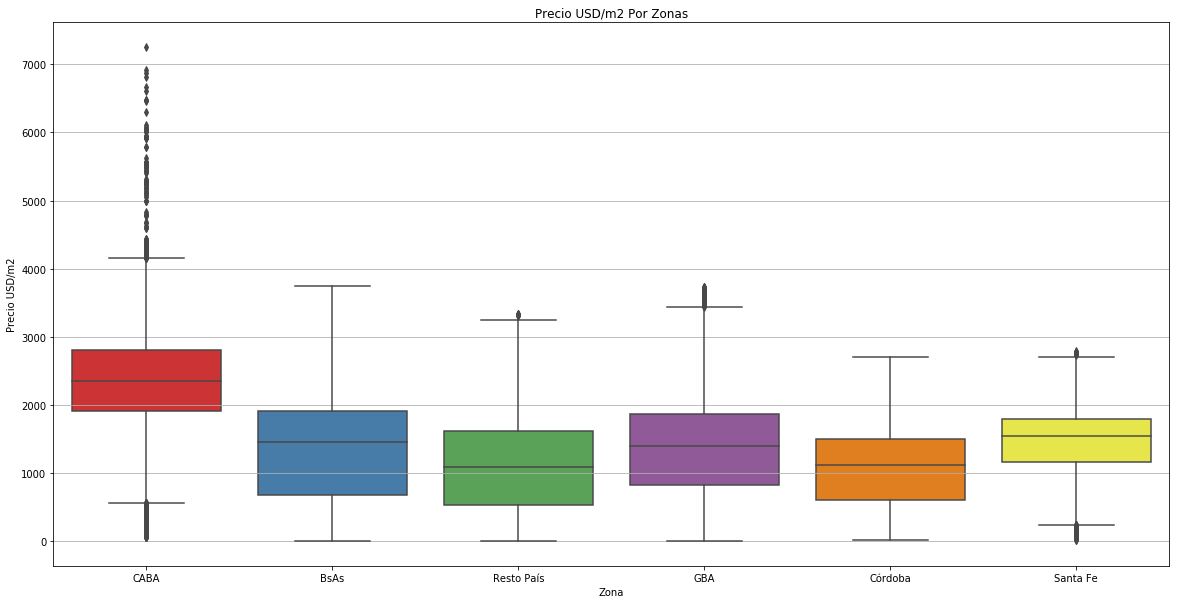

In [110]:
plt.figure(figsize=(20,10))
plt.grid(True)  

ax = sns.boxplot(x="Zona", y="price_usd_per_m2", data=data, palette="Set1")
plt.title('Precio USD/m2 Por Zonas')
plt.xlabel('Zona')
plt.ylabel('Precio USD/m2')

In [111]:
print("Se van a dropear {} filas (falta de variable objetivo).".format(data['price_usd_per_m2'].isna().sum()))

Se van a dropear 21562 filas (falta de variable objetivo).


In [112]:
falta_target = data.loc[data['price_usd_per_m2'].isna()].index
data.drop(index=falta_target,inplace=True)

In [113]:
#data.drop(columns=['clean_sup_cub','temp_sup_cub','clean_sup_tot','temp_sup_tot'],inplace=True)

In [114]:
data[price_cols].notnull().sum()

price                         45776
currency                      45776
price_aprox_local_currency    45776
price_aprox_usd               45776
surface_total_in_m2           42512
surface_covered_in_m2         39431
price_usd_per_m2              45776
price_per_m2                  42251
surface_uncovered_in_m2       36167
dtype: int64

In [115]:
#data.loc[data['price_usd_per_m2'].notnull(),['Provincia','price_usd_per_m2']].groupby('Provincia').apply(calculate_iqr_values)

## Columna Floor

### Funciones para Limpieza y Búsqueda de Datos

In [116]:
#!pip install unidecode
import unidecode

def quitar_caracteres(entrada):
    return str.lower(unidecode.unidecode(entrada))

#Revisar y ver que pasa con varias ocurrencias
def text_floor_search(text):
    floor_map = {
        'primer': 1.0,'segundo': 2.0,'tercer': 3.0,'cuarto': 4.0,'quinto': 5.0,
        'sexto': 6.0,'septimo': 7.0,'octavo': 8.0,'noveno': 9.0,'decimo': 10.0
    }
    
    pattern_fl = r'(\w{2,7})\s?(?:piso)'
    regex_fl = re.compile(pattern_fl, flags = re.IGNORECASE)
    floors_lst = regex_fl.findall(text)
    
    if not floors_lst:
        return np.nan
    if len(floors_lst)!=1:
        return np.nan
    if quitar_caracteres(floors_lst[0]) not in floor_map.keys():
        return np.nan
    floor = floor_map[quitar_caracteres(floors_lst[0])]
    return floor

#Revisar y ver que pasa con varias ocurrencias
def text_search_floor(text):
    floor_map = {
        'un': 1.0,'uno': 1.0,'dos': 2.0,'tres': 3.0,'cuatro': 4.0,'cinco': 5.0,
        'seis': 6.0,'siete': 7.0,'ocho': 8.0,'nueve': 9.0,'diez': 10.0,'once': 11.0,
        'doce': 12.0,'trece': 13.0,'catorce': 14.0,'quince': 15.0
    }
    
    pattern_fl = r'(?:piso)\s?(\w{2,7})'
    regex_fl = re.compile(pattern_fl, flags = re.IGNORECASE)
    floors_lst = regex_fl.findall(text)
    
    if not floors_lst:
        return np.nan
    if len(floors_lst)==0:
        return np.nan
    if len(floors_lst)==1:
        num = floors_lst[0]
        if quitar_caracteres(num) not in floor_map.keys():
            return np.nan
        floor = floor_map[quitar_caracteres(num)]
        return floor
    else:
        floors_l = [item for item in floors_lst]
        floors_val = [int(item in floor_map) for item in floors_l]
        for floor,val in zip(floors_l,floors_val):
            if val==1:
                return floor_map[floor]
        return np.nan

#Revisar y ver que pasa con varias ocurrencias
def num_floor_search(text):
    pattern_fl = r'(\d{1,2})\.?(°|\w{2})\s?(?:piso)'
    regex_fl = re.compile(pattern_fl, flags = re.IGNORECASE)
    floors_lst = regex_fl.findall(text)
    
    abb_lst = ['er','do','to','mo','vo','no','deg','ero','']

    if not floors_lst:
        return np.nan
    if len(floors_lst)!=1:
        return np.nan
    sufijo=quitar_caracteres(floors_lst[0][1])
    if sufijo not in abb_lst:
        return np.nan
    num=float(floors_lst[0][0])
#     if num<15 and num>9:
#         print("Piso: {}".format(num))
#         print(text)
    if num>15:
        return np.nan
    else:
        return num
    
    #return(floors_lst)

#Revisar y ver que pasa con varias ocurrencias
def num_search_floor(text):
    pattern_fl = r'\s?(?:piso)(\d{1,2})'
    regex_fl = re.compile(pattern_fl, flags = re.IGNORECASE)
    floors_lst = regex_fl.findall(text)
    
    if not floors_lst:
        return np.nan
    if len(floors_lst)!=1:
        return np.nan
    num = float(floors_lst[0])
    if num>40:
        return np.nan
    else:
        return num
    

def clean_temp_col(df,tempCol):
    """Cleans a tempCol column from a df dataframe. Writes nan on every row.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe you want to clean a temporary column.
    tempCol: str
        The name passed as a string of the column to clean.
    """
    df.loc[:,tempCol]=np.nan

def new_found(df,tempCol,cleanCol):
    """Shows a message about the new data found.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to take data from.
    tempCol: str
        The name passed as a string of the temporary column.
    cleanCol: str
        the name passed as a string of the clean column.
    """
    print("Nuevos: {}.".format(df[tempCol].notnull().sum()))
    print("Total: {}.".format(df[cleanCol].notnull().sum()))

import scipy.stats as stats

#valor_mas_chico=0

def calculate_iqr_values(array):
    """Calculates inferior and superior limits of the iqr plus a margin.
    Returns
    ---------
    lim_inf: float
        q1-1.5*iqr
    lim_sup: float
        q3+1.5*iqr
    """
    q1,q3=np.percentile(array,[25 ,75])
    arr_iqr = stats.iqr(array)
    lim_inf = q1-1.5*arr_iqr
#     if lim_inf<valor_mas_chico:
#         lim_inf=valor_mas_chico
    lim_sup = q3+1.5*arr_iqr
    return lim_inf,lim_sup

def check_outliers(x,min_lim,max_lim):
    if x<min_lim:
        return np.nan
    elif x>max_lim:
        return np.nan
    else:
        return x

**Límites Generales de Pisos Para Casas y PH**

In [117]:
def floor_filter():
    floor_lim_house = (0,3)
    floor_lim_ph = (0,3)
    floor_limits = [('house',floor_lim_house),('PH',floor_lim_ph)]

    for item in floor_limits:
        col=item[0]
        minmax=item[1]
        min_floor=minmax[0]
        max_floor=minmax[1]

        data.loc[data['property_type']==col,'floor'] = data.loc[data['property_type']==col,'floor'].apply(lambda x: np.nan if x<min_floor or x>max_floor else x)
        
    
floor_filter()

**Límites impuestos para cada tipo de propiedad**

Busco qué casas están en el primer piso. El resto completo con cero.

In [118]:
def floor_filter_caba():
   floor_lim_house = (0,3)
   floor_lim_ph = (0,3)
   floor_lim_store = (0,40)
   floor_lim_apartment = (0,40)
   floor_limits = [('house',floor_lim_house),('PH',floor_lim_ph),('store',floor_lim_store),('apartment',floor_lim_apartment)]

   for item in floor_limits:
       col=item[0]
       minmax=item[1]
       min_floor=minmax[0]
       max_floor=minmax[1]

       data.loc[(data['Ciudad']=='Capital Federal')&(data['property_type']==col),'floor'] = data.loc[(data['Ciudad']=='Capital Federal')&(data['property_type']==col),'floor'].apply(lambda x: np.nan if x<min_floor or x>max_floor else x)
       
   
floor_filter_caba()

In [119]:
variantes = ['1er piso por escalera','1° piso por escalera','1 piso por escalera',
            'primer piso por escalera','planta alta por escalera']

cols = ['description','title']

for col in cols:
    for text in variantes:
        house_PA=data.loc[(data['property_type']=='house')&(data['floor'].isna())][col]\
        .str.contains(text,case=False,regex=False).astype(float).apply(lambda x: x if x else np.nan)
        #chequear
        data.loc[data['property_type']=='house','floor'].fillna(value=house_PA,inplace=True)
        #data.loc[(data['property_type']=='house')&(data['floor'].isna()),'floor']=data.loc[(data['property_type']=='house')&(data['floor'].isna()),'floor'].add(house_PA,fill_value=0)
data.loc[(data['property_type']=='house')&(data['floor'].isna()),'floor']=0

In [120]:
data.loc[data['property_type']=='house']['floor'].value_counts(dropna=False, sort=True)

0.0    19539
2.0        7
1.0        7
3.0        1
Name: floor, dtype: int64

In [121]:
patterns_pb = ['planta baja','PB','P.B.']
acc_1 = ['primer piso','1er piso','1° piso']
acc_2 = ['segundo piso','2do piso','2° piso']
acc_3 = ['tercer piso','3er piso','3° piso']

accepted = [patterns_pb,acc_1,acc_2,acc_3]
piso = 0.0
for acc in accepted:
    for text in acc:
        ph_piso = data.loc[(data['property_type']=='PH')&(data['floor'].isna()),'description']\
        .str.contains(text,case=False,regex=False)
        data.loc[(data['property_type']=='PH')&(ph_piso),'floor']=piso
    piso+=1
#data.loc[(data['property_type']=='PH')]['floor'].value_counts(dropna=False,sort=True)
data.loc[(data['property_type']=='PH')&(data['floor'].isna()),'floor']=0

In [122]:
data['floor'].isna().sum()

21994

In [123]:
func_lst = [text_floor_search,text_search_floor,num_floor_search,num_search_floor]
cols = ['title','description']
for col in cols:
    for func in func_lst:
        data.loc[(data['property_type']=='store'),"floor"].fillna(value=data.loc[(data['floor'].isna())&(data['property_type']=='store'),col].apply(func), inplace=True)

data.loc[(data['property_type']=='store')&(data['floor'].isna()),'floor']=0


In [124]:
data['floor'].isna().sum()

21738

In [125]:
data['description'] = data['description'].fillna("-")
fl_func_lst = [text_floor_search,num_floor_search,text_search_floor,num_search_floor]
col_lst = ['title','description']
for col in col_lst:
    for func in fl_func_lst:
        data.loc[(data['property_type']=='apartment'),"floor"].fillna(value=data.loc[(data['floor'].isna())&(data['property_type']=='apartment'),col].apply(func), inplace=True)


In [126]:
data['floor'].isna().sum()

21738

## GBA - Detección de Outliers para Floor

In [127]:
iqr_values_GBA_AP=calculate_iqr_values(data.loc[((data['property_type']=='apartment')&(data['floor'].notnull())&(data['Zona']=='GBA')),'floor'])
print(data.loc[((data['property_type']=='apartment')&(data['floor'].notnull())&(data['Zona']=='GBA')),'floor'].apply(check_outliers,args=iqr_values_GBA_AP).unique())
print(iqr_values_GBA_AP)

[ 2.  3.  1. nan  4.  6.  7.  8.  5.]
(-3.5, 8.5)


In [128]:
data.loc[(data['Zona']=='GBA')&(data['property_type']=='apartment')&(data['floor']>iqr_values_GBA_AP[1]),'floor']=np.nan

In [129]:
data.loc[((data['property_type']=='apartment')&(data['floor'].notnull())&(data['Zona']=='GBA')),'floor'].describe()

count    882.000000
mean       2.963719
std        1.888744
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        8.000000
Name: floor, dtype: float64

In [130]:
iqr_values_GBA_ST=calculate_iqr_values(data.loc[((data['property_type']=='store')&(data['floor'].notnull())&(data['Zona']=='GBA')),'floor'])
print(data.loc[((data['property_type']=='store')&(data['floor'].notnull())&(data['Zona']=='GBA')),'floor'].apply(check_outliers,args=iqr_values_GBA_ST).unique())
print(iqr_values_GBA_ST)

[ 0. nan]
(0.0, 0.0)


In [131]:
data.loc[(data['Zona']=='GBA')&(data['property_type']=='store')&(data['floor']>iqr_values_GBA_ST[1]),'floor']=np.nan

La estrategia posterior de imputacíon de floor, será la mediana por Localidad. Se dropean datos que no cuentan con esa información

In [132]:
floor_por_Localidad = data.loc[(data['Zona']=='GBA')&(data['property_type']=='apartment')&(data['floor'].notnull()),['Ciudad','floor']].groupby('Ciudad').count().reset_index()
#floor_por_Localidad
localidad_sin_floor = floor_por_Localidad.loc[floor_por_Localidad['floor']==0]['Ciudad'].to_list()
#localidad_sin_floor

loc_drop_ind = []
for lugar in localidad_sin_floor:
    loc_drop_ind.append(data.loc[data['Ciudad']==lugar].index.values[0])
loc_drop_ind = pd.Index(loc_drop_ind)
print("Se van a dropear {} por falta de datos de floor.".format(loc_drop_ind.size))
data.drop(index=loc_drop_ind,inplace=True)

Se van a dropear 0 por falta de datos de floor.


## Córdoba - Detección de Outliers para Floor

In [133]:
iqr_values_CBA_AP=calculate_iqr_values(data.loc[((data['property_type']=='apartment')&(data['floor'].notnull())&(data['Zona']=='Córdoba')),'floor'])
data.loc[(data['Zona']=='Córdoba')&(data['property_type']=='apartment')&(data['floor']>iqr_values_CBA_AP[1]),'floor']=np.nan
iqr_values_CBA_ST=calculate_iqr_values(data.loc[((data['property_type']=='store')&(data['floor'].notnull())&(data['Zona']=='Córdoba')),'floor'])
data.loc[(data['Zona']=='Córdoba')&(data['property_type']=='store')&(data['floor']>iqr_values_CBA_AP[1]),'floor']=np.nan

## Santa Fé - Detección de Outliers para Floor

In [134]:
iqr_values_sta_AP=calculate_iqr_values(data.loc[((data['property_type']=='apartment')&(data['floor'].notnull())&(data['Zona']=='Santa Fe')),'floor'])
data.loc[(data['Zona']=='Santa Fe')&(data['property_type']=='apartment')&(data['floor']>iqr_values_sta_AP[1]),'floor']=np.nan
iqr_values_sta_ST=calculate_iqr_values(data.loc[((data['property_type']=='store')&(data['floor'].notnull())&(data['Zona']=='Santa Fe')),'floor'])
data.loc[(data['Zona']=='Santa Fe')&(data['property_type']=='store')&(data['floor']>iqr_values_sta_ST[1]),'floor']=np.nan

## Costa Atlántica - Detección de Outliers para Floor

In [135]:
iqr_values_costa_AP=calculate_iqr_values(data.loc[((data['property_type']=='apartment')&(data['floor'].notnull())&(data['Provincia']=='Buenos Aires Costa Atlántica')),'floor'])
data.loc[(data['Provincia']=='Buenos Aires Costa Atlántica')&(data['property_type']=='apartment')&(data['floor']>iqr_values_costa_AP[1]),'floor']=np.nan
iqr_values_costa_ST=calculate_iqr_values(data.loc[((data['property_type']=='store')&(data['floor'].notnull())&(data['Provincia']=='Buenos Aires Costa Atlántica')),'floor'])
data.loc[(data['Provincia']=='Buenos Aires Costa Atlántica')&(data['property_type']=='store')&(data['floor']>iqr_values_costa_ST[1]),'floor']=np.nan

## BsAs Interior - Detección de Outliers para Floor

In [136]:
iqr_values_bsas_AP=calculate_iqr_values(data.loc[((data['property_type']=='apartment')&(data['floor'].notnull())&(data['Provincia']=='Buenos Aires Interior')),'floor'])
data.loc[(data['Provincia']=='Buenos Aires Interior')&(data['property_type']=='apartment')&(data['floor']>iqr_values_bsas_AP[1]),'floor']=np.nan
iqr_values_bsas_ST=calculate_iqr_values(data.loc[((data['property_type']=='store')&(data['floor'].notnull())&(data['Provincia']=='Buenos Aires Interior')),'floor'])
data.loc[(data['Provincia']=='Buenos Aires Interior')&(data['property_type']=='store')&(data['floor']>iqr_values_bsas_ST[1]),'floor']=np.nan

Text(0, 0.5, 'Floor')

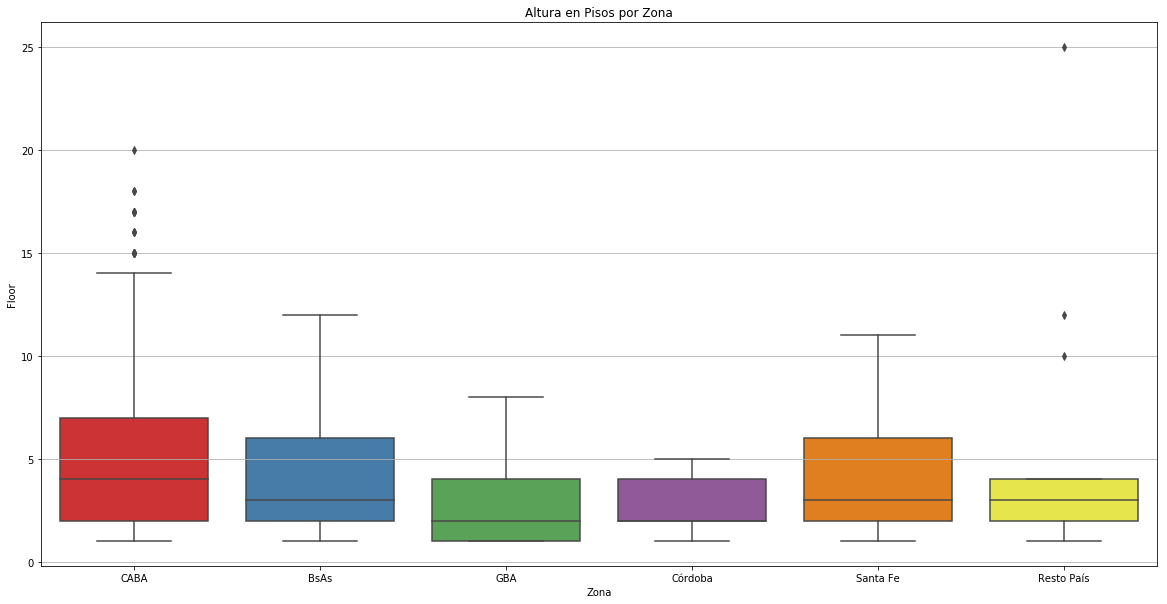

In [137]:
apartment_df = data.loc[data['property_type']=='apartment']
plt.figure(figsize=(20,10))
plt.grid(True)  

ax = sns.boxplot(x="Zona", y="floor", data=apartment_df, palette="Set1")
plt.title('Altura en Pisos por Zona')
plt.xlabel('Zona')
plt.ylabel('Floor')

Luego del split vamos a imputar los valores faltantes por la media por lugar. Entonces dropeamos los que no vamos a poder imputar mas tarde.

In [138]:
apartment_df = data.groupby('property_type').get_group('apartment')

temp_place_floor = (apartment_df[['floor','place_name']].groupby('place_name').count()==0).reset_index()
temp_place_floor['floor'] = temp_place_floor['floor'].astype(int)

place_without_floor = temp_place_floor.loc[temp_place_floor['floor']==1,'place_name'].tolist()

temp_floor_drop = apartment_df.loc[(apartment_df['floor'].isna()),'place_name'].apply(lambda x: 1 if x in place_without_floor else 0)
#print(temp_floor_drop)
print("Se va a dropear: {}".format(temp_floor_drop.sum()))

data.drop(temp_floor_drop[temp_floor_drop==1].index,inplace=True)

Se va a dropear: 1776


In [139]:
data['floor'].isna().sum()

20015

In [140]:
data.notnull().sum()

operation                     44000
property_type                 44000
place_name                    44000
place_with_parent_names       44000
country_name                  44000
state_name                    44000
geonames_id                   36153
lat-lon                       27225
price                         44000
currency                      44000
price_aprox_local_currency    44000
price_aprox_usd               44000
surface_total_in_m2           40904
surface_covered_in_m2         38081
price_usd_per_m2              44000
price_per_m2                  40660
floor                         23985
rooms                         44000
expenses                       5530
properati_url                 44000
description                   44000
title                         44000
image_thumbnail               43481
Pais                          44000
Provincia                     44000
Ciudad                        42999
Barrio                        26798
Sub-Barrio                  

In [141]:
data['property_type'].value_counts()

apartment    21956
house        19554
PH            2231
store          259
Name: property_type, dtype: int64

Hay que revisar cuáles se van a poder imputar y cuáles no. Las que no se puedan imputar, se eliminan.

In [142]:
data.loc[data['surface_total_in_m2'].isna(),price_cols].head(10)

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,surface_uncovered_in_m2
28,170500.00,USD,3008387.25,170500.00,NaN,46.0,1705.000000,3706.521739,NaN
34,300000.00,USD,5293350.00,300000.00,NaN,260.0,276.497696,1153.846154,NaN
51,54000.00,USD,952803.00,54000.00,NaN,30.0,720.000000,1800.000000,NaN
61,497000.00,USD,8769316.50,497000.00,NaN,256.0,523.157895,1941.406250,NaN
109,235000.00,USD,4146457.50,235000.00,NaN,48.0,3455.882353,4895.833333,NaN
116,237895.00,USD,4197538.32,237895.00,NaN,53.0,3447.753623,4488.584906,NaN
117,237895.00,USD,4197538.32,237895.00,NaN,53.0,3447.753623,4488.584906,NaN
123,127422.11,USD,2248299.41,127422.11,NaN,39.0,995.485234,3267.233503,NaN
128,260000.00,USD,4587570.00,260000.00,NaN,250.0,260.000000,1040.000000,NaN
162,169000.00,USD,2981920.50,169000.00,NaN,160.0,179.787234,1056.250000,NaN


In [143]:
data['const_index'] = data['surface_covered_in_m2']/data['surface_total_in_m2']
lugares_const_index = data[['const_index','place_name']].groupby('place_name').count().reset_index()
lugares_sin_const_index = lugares_const_index.loc[lugares_const_index['const_index']==0]['place_name'].to_list()
sup_drop_index = []
for lugar in lugares_sin_const_index:
    sup_drop_index.append(data.loc[data['place_name']==lugar].index[0])
sup_drop_index=pd.Index(sup_drop_index)
print("Se dropean {} filas por falta de datos para indice de construccion".format(sup_drop_index.size))
data.drop(index=sup_drop_index,inplace=True)

Se dropean 59 filas por falta de datos para indice de construccion


In [144]:
columnas_que_no_sirven = ['operation','geonames_id','lat','lon','lat-lon','currency',\
                         'price_aprox_local_currency','price_aprox_usd','price_per_m2',\
                         'expenses','properati_url','description','title','image_thumbnail','complete_place_name',\
                         'Sub-Barrio','country_name','state_name','Pais','place_with_parent_names']
data.drop(columns=columnas_que_no_sirven).notnull().sum()

property_type              43941
place_name                 43941
price                      43941
surface_total_in_m2        40880
surface_covered_in_m2      38046
price_usd_per_m2           43941
floor                      23926
rooms                      43941
Provincia                  43941
Ciudad                     42942
Barrio                     26774
surface_uncovered_in_m2    34985
Zona                       43941
const_index                34985
dtype: int64

# Variables Dummy: Amenities

Se busca crear variables dummy de características que sumen para la regresión del desafío 2. Para esto una función que devuelve una serie con '1' y '0' en caso de presencia o ausencia de amenity.

In [145]:
def get_amenity(pat_with,pat_without):
    amenity = data.loc[:,'description'].str.contains(pat_with,flags=re.IGNORECASE,regex=True).astype(float)
    no_amenity = data.loc[:,'description'].str.contains(pat_without,flags=re.IGNORECASE,regex=True).astype(float)
    amenity[no_amenity==1]=0
    return(amenity)

Búsqueda de Cochera:

In [146]:
cochera_pattern = r"(?:cochera|estacionamiento|garage)"
sincochera_pattern = r"(?:sin cochera|sin estacionamiento|sin garage)"
cochera = get_amenity(cochera_pattern,sincochera_pattern)
print(cochera.value_counts())

0.0    25444
1.0    18497
Name: description, dtype: int64


Búsqueda de Gym:

In [147]:
gym_pattern = r"(?:gym|gimnasio|gimnasia)"
singym_pattern = r"(?:sin gym|sin gimnasio|sin gimnasia)"
gym = get_amenity(gym_pattern,singym_pattern)
print(gym.value_counts())

0.0    41123
1.0     2818
Name: description, dtype: int64


Búsqueda de Piscina:

In [148]:
piscina_pattern = r"(?:piscina|pisicina|pileta)"
sinpiscina_pattern = r"(?:sin piscina|sin pisicina|sin pileta)"
piscina = get_amenity(piscina_pattern,sinpiscina_pattern)
print(piscina.value_counts())

0.0    30703
1.0    13238
Name: description, dtype: int64


Búsqueda de SUM:

In [149]:
SUM_pattern = r"(?:SUM|salón|salon|playroom)"
sinSUM_pattern = r"(?:sin SUM|sin salón|sin salon|sin playroom)"
SUM = get_amenity(SUM_pattern,sinSUM_pattern)
print(SUM.value_counts())

0.0    35438
1.0     8503
Name: description, dtype: int64


Búsqueda de Laundry:

In [150]:
laundry_pattern = r"(?:laundy|laundry|lavadero)"
sinlaundry_pattern = r"(?:sin laundy|sin laundry|sin lavadero)"
laundry = get_amenity(laundry_pattern,sinlaundry_pattern)
print(laundry.value_counts())

0.0    26318
1.0    17623
Name: description, dtype: int64


Búsqueda de Balcón:

In [151]:
balcon_pattern = r"(?:balcon|balcón)"
sinbalcon_pattern = r"(?:sin balcon|sin balcón)"
balcon = get_amenity(balcon_pattern,sinbalcon_pattern)
print(balcon.value_counts())

0.0    28856
1.0    15085
Name: description, dtype: int64


Búsqueda de Patio:

In [152]:
patio_pattern = r"(?:patio|jardín|jardin)"
sinpatio_pattern = r"(?:sin patio|sin jardín|sin jardin)"
patio = get_amenity(patio_pattern,sinpatio_pattern)
print(patio.value_counts())

0.0    29482
1.0    14459
Name: description, dtype: int64


Búsqueda de Parrilla:

In [153]:
parrilla_pattern = r"(?:parrilla)"
sinparrilla_pattern = r"(?:sin parrilla)"
parrilla = get_amenity(parrilla_pattern,sinparrilla_pattern)
print(parrilla.value_counts())

0.0    28714
1.0    15227
Name: description, dtype: int64


Armado de columnas/features dicotómicas para Amenities:

In [154]:
amenities = {
    'cochera':cochera,
    'gimnasio':gym,
    'piscina':piscina,
    'SUM':SUM,
    'laundry':laundry,
    'balcon':balcon,
    'patio':patio,
    'parrilla':parrilla
}

for key,item in amenities.items():
    data[key]=item
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'price',
       'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'Pais', 'Provincia',
       'Ciudad', 'Barrio', 'Sub-Barrio', 'complete_place_name', 'lat', 'lon',
       'surface_uncovered_in_m2', 'Zona', 'const_index', 'cochera', 'gimnasio',
       'piscina', 'SUM', 'laundry', 'balcon', 'patio', 'parrilla'],
      dtype='object')

# Expensas

In [155]:
# data.loc[((data['property_type']=='house')|(data['property_type']=='PH'))&(data['expenses'].isna()),'expenses']=0

In [156]:
# def expenses_search(text):
#     pattern =  r'(?:expensas\s?\$|expensa\s?\$|expensas:\s?\$|expensa:\s?\$)\s?(\d+,?\.?\d*,?\.?\d*)'
#     regex = re.compile(pattern, flags = re.IGNORECASE)
#     exp_lst = regex.findall(text)
#     exp_lst = [float(item.replace(',','').replace('.','')) for item in exp_lst]
  
#     if not exp_lst:
#         return np.nan
#     if len(exp_lst)>1:
#         if max(exp_lst)>1000:
#             return max(exp_lst)
#         else:
#             return np.nan
#     if len(exp_lst)==1:
#         if exp_lst[0]>1000:
#             return exp_lst[0]
#         else:
#             return np.nan

In [157]:
# data.loc[data['expenses'].isna(),'description'].apply(expenses_search).count()

In [158]:
# data["expenses"].fillna(value=data.loc[data['expenses'].isna(),'description'].apply(expenses_search), inplace=True)

In [159]:
# pattern = r'(?:sin expensas,|sin expensas|sin gastos de expensas|no paga expensas|s\/expensas|\/sin expensas|sin expensa\s)\s?'
# # aplicamos el patron de búsqueda y transformamos los valores del booleando 
# expenses_search2=(data.loc[data['expenses'].isna(),'description'].str.contains(pattern, flags=re.IGNORECASE, regex=True)*1).replace([0,1],[np.nan, 0])
# expenses_search2.value_counts(dropna=False)

In [160]:
# data['expenses'].fillna(value=expenses_search2, inplace=True)

In [161]:
data.notnull().sum()

operation                     43941
property_type                 43941
place_name                    43941
place_with_parent_names       43941
country_name                  43941
state_name                    43941
geonames_id                   36117
lat-lon                       27185
price                         43941
currency                      43941
price_aprox_local_currency    43941
price_aprox_usd               43941
surface_total_in_m2           40880
surface_covered_in_m2         38046
price_usd_per_m2              43941
price_per_m2                  40622
floor                         23926
rooms                         43941
expenses                       5528
properati_url                 43941
description                   43941
title                         43941
image_thumbnail               43424
Pais                          43941
Provincia                     43941
Ciudad                        42942
Barrio                        26774
Sub-Barrio                  

In [162]:
data.loc[(data['surface_covered_in_m2'].isna())&(data['surface_total_in_m2'].isna())].shape

(0, 42)

## Cómo quedan los datos por provincias?

In [163]:
data['Provincia'].value_counts()

Capital Federal                 12142
Bs.As. G.B.A. Zona Norte        11684
Bs.As. G.B.A. Zona Oeste         4650
Buenos Aires Costa Atlántica     4450
Bs.As. G.B.A. Zona Sur           4090
Córdoba                          2605
Santa Fe                         2593
Buenos Aires Interior             643
Corrientes                        218
Neuquén                           152
Río Negro                         137
Mendoza                           125
Misiones                          118
San Luis                           95
Chubut                             78
Entre Ríos                         39
Salta                              39
Tucumán                            35
Tierra Del Fuego                   16
Santa Cruz                         10
Chaco                               9
La Pampa                            4
Jujuy                               3
La Rioja                            2
Catamarca                           2
San Juan                            1
Santiago Del

# Guardado del nuevo dataset 'limpio'

In [164]:
columns_rename = {'price':'price_usd','Ciudad':'Localidad',\
                  'surface_covered_in_m2':'sup_cub', 'surface_total_in_m2':'sup_total',\
                  'surface_uncovered_in_m2':'sup_descub','property_type':'tipo_propiedad'
                 }
data.rename(columns=columns_rename,inplace=True)
data.head()

,operation,tipo_propiedad,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,price_usd,currency,...,Zona,const_index,cochera,gimnasio,piscina,SUM,laundry,balcon,patio,parrilla
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",62000.0,USD,...,CABA,0.727273,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",64000.0,USD,...,BsAs,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",130000.0,USD,...,GBA,0.735849,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",138000.0,USD,...,CABA,0.888889,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,sell,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3430813.0,"-34.4860195,-58.5038139",115000.0,USD,...,GBA,0.923077,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [165]:
data.columns

Index(['operation', 'tipo_propiedad', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'price_usd',
       'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'sup_total', 'sup_cub', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'Pais', 'Provincia', 'Localidad', 'Barrio',
       'Sub-Barrio', 'complete_place_name', 'lat', 'lon', 'sup_descub', 'Zona',
       'const_index', 'cochera', 'gimnasio', 'piscina', 'SUM', 'laundry',
       'balcon', 'patio', 'parrilla'],
      dtype='object')

In [166]:
columnas_que_no_sirven = ['operation','place_with_parent_names','country_name', 'state_name',
                          'geonames_id','lat-lon','lat', 'lon',
                          'currency', 'price_aprox_local_currency', 'price_aprox_usd','price_per_m2',
                          'expenses', 'properati_url', 'description', 'title','image_thumbnail',
                          'Pais','Sub-Barrio', 'complete_place_name','const_index', 
                         ]

In [167]:
data2 = data.drop(columns=columnas_que_no_sirven).reset_index().drop(columns='index').copy()
data2.head()

,tipo_propiedad,place_name,price_usd,sup_total,sup_cub,price_usd_per_m2,floor,rooms,Provincia,Localidad,...,sup_descub,Zona,cochera,gimnasio,piscina,SUM,laundry,balcon,patio,parrilla
0,PH,Mataderos,62000.0,55.0,40.0,1127.272727,0.0,2.0,Capital Federal,Capital Federal,...,15.0,CABA,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,apartment,Centro,64000.0,35.0,35.0,1828.571429,NaN,2.0,Buenos Aires Costa Atlántica,Mar del Plata,...,0.0,BsAs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PH,Munro,130000.0,106.0,78.0,1226.415094,0.0,3.0,Bs.As. G.B.A. Zona Norte,Vicente López,...,28.0,GBA,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,apartment,Belgrano,138000.0,45.0,40.0,3066.666667,NaN,1.0,Capital Federal,Capital Federal,...,5.0,CABA,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,apartment,Martínez,115000.0,39.0,36.0,2948.717949,NaN,2.0,Bs.As. G.B.A. Zona Norte,San Isidro,...,3.0,GBA,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [168]:
data2.columns

Index(['tipo_propiedad', 'place_name', 'price_usd', 'sup_total', 'sup_cub',
       'price_usd_per_m2', 'floor', 'rooms', 'Provincia', 'Localidad',
       'Barrio', 'sup_descub', 'Zona', 'cochera', 'gimnasio', 'piscina', 'SUM',
       'laundry', 'balcon', 'patio', 'parrilla'],
      dtype='object')

In [169]:
final_cols = ['tipo_propiedad','Provincia','Zona','Localidad','Barrio','place_name',
              'cochera', 'gimnasio', 'piscina', 'SUM', 'laundry','balcon', 'patio','parrilla',
              'floor','rooms','price_usd','sup_cub','sup_descub','sup_total','price_usd_per_m2']
data2 = data2[final_cols]
data2.head()

,tipo_propiedad,Provincia,Zona,Localidad,Barrio,place_name,cochera,gimnasio,piscina,SUM,...,balcon,patio,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2
0,PH,Capital Federal,CABA,Capital Federal,Mataderos,Mataderos,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,62000.0,40.0,15.0,55.0,1127.272727
1,apartment,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,Centro,Centro,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,2.0,64000.0,35.0,0.0,35.0,1828.571429
2,PH,Bs.As. G.B.A. Zona Norte,GBA,Vicente López,Munro,Munro,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.0,130000.0,78.0,28.0,106.0,1226.415094
3,apartment,Capital Federal,CABA,Capital Federal,Belgrano,Belgrano,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,NaN,1.0,138000.0,40.0,5.0,45.0,3066.666667
4,apartment,Bs.As. G.B.A. Zona Norte,GBA,San Isidro,Martínez,Martínez,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,NaN,2.0,115000.0,36.0,3.0,39.0,2948.717949


In [170]:
#data.drop(columns=columnas_que_no_sirven).reset_index().iloc[:,1:].to_csv('datos_previos_clean.csv')
data2.to_csv('../Data/datos_previos_clean.csv')

In [171]:
data2.loc[(data2['tipo_propiedad']=='apartment')&(data2['floor']==0),:]

,tipo_propiedad,Provincia,Zona,Localidad,Barrio,place_name,cochera,gimnasio,piscina,SUM,...,balcon,patio,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2


In [172]:
data2.shape

(43941, 21)